In [29]:
# create new folder
import os
import sys
os.chdir(sys.path[3])
q_research= 'cities_in_alberta'
fol_to_q_research = r'python/notebooks/output/{}'.format(q_research)
os.mkdir(fol_to_q_research )
os.mkdir(r'{}/{}'.format(fol_to_q_research,'figs'))
os.mkdir(r'{}/{}'.format(fol_to_q_research,'csv'))

In [1]:
import sys
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
from tabulate import tabulate

In [5]:
os.chdir(sys.path[3])
rec_file = pd.read_csv(r'data/process/res_with_geo_loc.csv')
rec_file

,Unnamed: 0.1,Unnamed: 0,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,...,Q38,Q39,Q39_10_TEXT,Q40,Q40_3_TEXT,lat,lon,score,stolen_bikes_place,country
0,1279,1343,1343,5/11/2022 11:17,5/11/2022 11:26,IP Address,172.58.88.249,100,488,True,...,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,-122.419640,37.777120,100.0,"San Francisco,California,USA",USA
1,1514,1607,1607,5/12/2022 8:56,5/12/2022 9:08,IP Address,107.77.229.161,100,714,True,...,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN,-117.229395,32.727105,100.0,"San Diego,California,USA",USA
2,718,745,745,5/3/2022 19:05,5/3/2022 19:19,IP Address,208.98.223.42,100,882,True,...,"Graduated high school (i.e., High school diplo...","European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN,-113.490140,53.545450,100.0,"Edmonton,Alberta,CAN",CAN
3,313,323,323,4/27/2022 16:30,4/27/2022 16:44,IP Address,99.171.110.253,100,832,True,...,Some university (no degree),"European (e.g., British Isles, German, French,...",NaN,Email,NaN,-117.874460,33.749580,100.0,"Santa Ana,California,USA",USA
4,1409,1492,1492,5/11/2022 14:54,5/11/2022 15:00,IP Address,76.103.138.149,100,319,True,...,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Email,NaN,-121.885420,37.338650,100.0,"San Jose,California,USA",USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1773,1967,1967,5/16/2022 17:58,5/16/2022 18:03,IP Address,73.189.49.55,82,295,False,...,NaN,NaN,NaN,NaN,NaN,-122.285410,38.299110,100.0,"Napa,California,USA",USA
1819,1786,1981,1981,6/1/2022 14:44,6/1/2022 14:51,IP Address,72.194.49.254,100,401,True,...,"Graduate degree (e.g., Master’s, Professional ...",I prefer to not answer,NaN,Email,NaN,-119.728880,34.441470,100.0,"Santa Barbara,California,USA",USA
1820,1795,1990,1990,6/2/2022 14:51,6/2/2022 14:56,IP Address,107.122.81.38,100,337,True,...,"Graduate degree (e.g., Master’s, Professional ...",Multi-ethnic (2+ ethnic groups),NaN,Other (please specify):,Facebook,-119.699050,34.419380,100.0,"Santa Barbara,California,USA",USA
1821,1823,2021,2021,5/24/2022 12:17,5/24/2022 12:20,IP Address,174.90.223.242,69,191,False,...,NaN,NaN,NaN,NaN,NaN,-114.057141,51.045113,100.0,"Calgary,Alberta,CAN",CAN


In [20]:
## get location of stolen and recover places and check if it is the same
def compare_places(row):
    stolen= row['stolen_bikes_place']
    stolen_list = stolen.split(',')
    # if one of the places not has information about the city compare the states
    if stolen_list[0]=='Edmonton' or stolen_list[0]=='Calgary' :
            return 'edm_cal'
    return 'no_edm_cal'

In [21]:
rec_file['is_same'] = rec_file.apply(compare_places,axis=1)

In [22]:
data_general= rec_file[rec_file['is_same'].notnull()]

In [23]:
data_general

,Unnamed: 0.1,Unnamed: 0,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,...,Q39,Q39_10_TEXT,Q40,Q40_3_TEXT,lat,lon,score,stolen_bikes_place,country,is_same
0,1279,1343,1343,5/11/2022 11:17,5/11/2022 11:26,IP Address,172.58.88.249,100,488,True,...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,-122.419640,37.777120,100.0,"San Francisco,California,USA",USA,no_edm_cal
1,1514,1607,1607,5/12/2022 8:56,5/12/2022 9:08,IP Address,107.77.229.161,100,714,True,...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN,-117.229395,32.727105,100.0,"San Diego,California,USA",USA,no_edm_cal
2,718,745,745,5/3/2022 19:05,5/3/2022 19:19,IP Address,208.98.223.42,100,882,True,...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN,-113.490140,53.545450,100.0,"Edmonton,Alberta,CAN",CAN,edm_cal
3,313,323,323,4/27/2022 16:30,4/27/2022 16:44,IP Address,99.171.110.253,100,832,True,...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,-117.874460,33.749580,100.0,"Santa Ana,California,USA",USA,no_edm_cal
4,1409,1492,1492,5/11/2022 14:54,5/11/2022 15:00,IP Address,76.103.138.149,100,319,True,...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,-121.885420,37.338650,100.0,"San Jose,California,USA",USA,no_edm_cal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1773,1967,1967,5/16/2022 17:58,5/16/2022 18:03,IP Address,73.189.49.55,82,295,False,...,NaN,NaN,NaN,NaN,-122.285410,38.299110,100.0,"Napa,California,USA",USA,no_edm_cal
1819,1786,1981,1981,6/1/2022 14:44,6/1/2022 14:51,IP Address,72.194.49.254,100,401,True,...,I prefer to not answer,NaN,Email,NaN,-119.728880,34.441470,100.0,"Santa Barbara,California,USA",USA,no_edm_cal
1820,1795,1990,1990,6/2/2022 14:51,6/2/2022 14:56,IP Address,107.122.81.38,100,337,True,...,Multi-ethnic (2+ ethnic groups),NaN,Other (please specify):,Facebook,-119.699050,34.419380,100.0,"Santa Barbara,California,USA",USA,no_edm_cal
1821,1823,2021,2021,5/24/2022 12:17,5/24/2022 12:20,IP Address,174.90.223.242,69,191,False,...,NaN,NaN,NaN,NaN,-114.057141,51.045113,100.0,"Calgary,Alberta,CAN",CAN,edm_cal


## Questions analysis based on recovery and non-recovery:

In [24]:
cols = list(data_general['is_same'].unique())
per_cols_by_ans = ['per_'+ col for col in cols]
colors =['green','orange']

## All the questions being examined here

In [25]:
data_store= []
# The code run over each tuple
for pair in {'Q2':'part','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q13':'estimate_val','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online', 'Q20': 'how_recovered','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income','Q37':'number_of_bikes', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per non/recovery and question_number
    sumy = DataFrame(index=list(data_general[data_general[question_number].notnull()][question_number].unique()))
    for i,name in enumerate(cols):
        rel_demographic = DataFrame(data_general[data_general['is_same'] == name][question_number])

        # Rearrange data
        rel_demographic = rel_demographic.rename(columns={question_number: per_name})
        rel_demographic = rel_demographic[rel_demographic[per_name].notna()].reset_index()

        # calculate absolute and relative count for each veritable
        sumy[[name]] = rel_demographic.groupby(by=[per_name]).count().rename(columns={'index': name})
        sumy.index.name = per_name
    if per_name == 'birth':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))


('Q2', 'part')
('Q6', 'day_time')
('Q7', 'is_locked')
('Q8', 'locked_type')
('Q9', 'theft_location')
('Q10', 'is_regi')
('Q11', 'report_loc')
('Q12', 'is_insured')
('Q13', 'estimate_val')
('Q14', 'is_electric')
('Q15', 'bike_type')
('Q17', 'is_university')
('Q19', 'is_online')
('Q20', 'how_recovered')
('Q21', 'is_police_assist')
('Q23', 'recovery_loc')
('Q24', 'con_recovery')
('Q34', 'birth')
('Q35', 'gender')
('Q36', 'income')
('Q37', 'number_of_bikes')
('Q38', 'education')
('Q39', 'ethnic_origin')


In [26]:
df = data_store[1].copy()
sum_per_answer = df.sum(axis=1)
df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100
temp_sum = df[cols].sum().sum()
temp_sum
tolerance = temp_sum/(len(df)*2)
tolerance

1815

181.5

In [27]:
## It combines two real and percentage values into one column
def prep_for_export(test):
    real = test[cols].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


part
those are not include in the results presentation since less than 452.0 tolerance                                                      no_edm_cal  edm_cal  \
part                                                                      
A major bicycle part necessary for riding (i.e....          24        0   

                                                    per_no_edm_cal  \
part                                                                 
A major bicycle part necessary for riding (i.e....           100.0   

                                                    per_edm_cal  
part                                                             
A major bicycle part necessary for riding (i.e....          0.0  


,no_edm_cal,edm_cal
part,,
"Entire bicycle (i.e., frame and components)",1583 (89%),201 (11%)


<AxesSubplot:xlabel='part'>

day_time
those are not include in the results presentation since less than 181.5 tolerance                         no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
day_time                                                               
Morning (06:00-11:59)         144       27       84.210526    15.789474


,no_edm_cal,edm_cal
day_time,,
Afternoon (12:00-17:59),309 (87%),48 (13%)
Overnight (00:00-05:59),645 (88%),90 (12%)
Don’t know/not sure,306 (93%),22 (7%)
Evening (18:00-23:59),210 (94%),14 (6%)


<AxesSubplot:xlabel='day_time'>

for no_edm_cal (86.55) : Afternoon (12:00-17:59) is outlier (new_mean:91.6, new_std:3.34)
for edm_cal (13.45) : Afternoon (12:00-17:59) is outlier (new_mean:8.4, new_std:3.34)
is_locked
those are not include in the results presentation since less than 227.125 tolerance                                                      no_edm_cal  edm_cal  \
is_locked                                                                 
Yes, locked one or more wheels (i.e., bike lock...         106       13   
Don’t know/not sure                                         30        4   

                                                    per_no_edm_cal  \
is_locked                                                            
Yes, locked one or more wheels (i.e., bike lock...       89.075630   
Don’t know/not sure                                      88.235294   

                                                    per_edm_cal  
is_locked                                                        
Yes, locked one

,no_edm_cal,edm_cal
is_locked,,
"No, unlocked",627 (88%),86 (12%)
"Yes, frame locked to a fixed structure (e.g., bike rack)",853 (90%),98 (10%)


<AxesSubplot:xlabel='is_locked'>

locked_type
those are not include in the results presentation since less than 9.535714285714286 tolerance                                                      no_edm_cal  edm_cal  \
locked_type                                                               
​U-lock      ,Chain-lock with padlock ,Cable lock            1        0   
Chain-lock combination (chain with mini u-lock ...           1        0   
Frame lock (aka wheel lock/O-lock/ring lock)                 8        0   
​U-lock      ,Cable lock ,Frame lock (aka wheel...           0        1   
​U-lock      ,Chain-lock combination (chain wit...           1        0   
​U-lock      ,Don’t know/not sure                            1        0   
Two U-Locks ,Other (please specify):                         1        0   
Chain-lock with padlock ,Frame lock (aka wheel ...           3        0   
Two U-Locks ,Cable lock                                      4        0   
Folding lock ,Other (please specify):,Don’t kno...           1      

,no_edm_cal,edm_cal
locked_type,,
Chain-lock with padlock,44 (92%),4 (8%)
​U-lock,258 (94%),16 (6%)
Cable lock,320 (87%),48 (13%)
"​U-lock ,Cable lock",46 (92%),4 (8%)
Other (please specify):,59 (83%),12 (17%)
Chain-lock combination (chain with mini u-lock or integrated locking mechanism),68 (82%),15 (18%)
Folding lock,24 (100%),0 (0%)
"Cable lock ,Other (please specify):",16 (100%),0 (0%)
"​U-lock ,Locking skewers",11 (100%),0 (0%)


<AxesSubplot:xlabel='locked_type'>

for no_edm_cal (81.93) : Chain-lock combination (chain with mini u-lock or integrated locking mechanism) is outlier (new_mean:93.36, new_std:6.55)
for edm_cal (18.07) : Chain-lock combination (chain with mini u-lock or integrated locking mechanism) is outlier (new_mean:6.64, new_std:6.55)
theft_location
those are not include in the results presentation since less than 82.77272727272727 tolerance                                                      no_edm_cal  edm_cal  \
theft_location                                                            
Against a street sign, tree, or street furnitur...          64        6   
Condo storage room                                          52       10   
Inside house/apartment                                      46        2   
Workplace office                                            18        1   
Building lobby                                              12        2   

                                                    per_no_edm_cal  \
thef

,no_edm_cal,edm_cal
theft_location,,
Inside a shed/garage,437 (85%),78 (15%)
Parking garage bike rack/railing/pipe/etc.,135 (92%),12 (8%)
Other (please specify):,253 (93%),18 (7%)
"Outside in the yard or on a balcony, porch, or patio",233 (91%),22 (9%)
Outdoor bike rack,285 (88%),38 (12%)
Controlled-access bicycle room or enclosed bike locker,85 (88%),12 (12%)


<AxesSubplot:xlabel='theft_location'>

for no_edm_cal (84.85) : Inside a shed/garage  is outlier (new_mean:90.49, new_std:2.45)
for edm_cal (15.15) : Inside a shed/garage  is outlier (new_mean:9.51, new_std:2.45)
is_regi
those are not include in the results presentation since less than 303.5 tolerance                       no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
is_regi                                                              
Don’t know/not sure          59        2       96.721311     3.278689


,no_edm_cal,edm_cal
is_regi,,
No,1004 (89%),121 (11%)
Yes,557 (88%),78 (12%)


<AxesSubplot:xlabel='is_regi'>

report_loc
those are not include in the results presentation since less than 60.7 tolerance                                                      no_edm_cal  edm_cal  \
report_loc                                                                
The police ,A bicycle registry/recovery system ...          41        2   
The police ,Social media (e.g. Instagram, Twitter)          45        5   
The police ,Other (please specify):                         12        3   
A bicycle registry/recovery system (e.g., Bike ...           2        3   
The police ,A bicycle registry/recovery system ...          20        1   
A bicycle registry/recovery system (e.g., Bike ...          32        5   
I did not report the theft                                  57        3   
The police ,Social media (e.g. Instagram, Twitt...           6        0   
A bicycle registry/recovery system (e.g., Bike ...           1        0   
Social media (e.g. Instagram, Twitter)                      10        0   
Other (

,no_edm_cal,edm_cal
report_loc,,
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",467 (87%),67 (13%)
The police,277 (90%),30 (10%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)",550 (89%),69 (11%)
"A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",84 (87%),13 (13%)


<AxesSubplot:xlabel='report_loc'>

for no_edm_cal (90.23) : The police  is outlier (new_mean:87.63, new_std:1.14)
for edm_cal (9.77) : The police  is outlier (new_mean:12.37, new_std:1.14)
is_insured
those are not include in the results presentation since less than 227.5 tolerance                          no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
is_insured                                                              
Don’t know/not sure             69       11           86.25        13.75
I prefer to not answer          11        0          100.00         0.00


,no_edm_cal,edm_cal
is_insured,,
No,966 (89%),118 (11%)
Yes,574 (89%),71 (11%)


<AxesSubplot:xlabel='is_insured'>

estimate_val
those are not include in the results presentation since less than 101.27777777777777 tolerance                          no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
estimate_val                                                            
$7000 or more                   90        7       92.783505     7.216495
Less than $250                  72        5       93.506494     6.493506
I prefer to not answer           2        0      100.000000     0.000000
Don’t know/not sure              5        0      100.000000     0.000000


,no_edm_cal,edm_cal
estimate_val,,
$2000-3999,263 (88%),36 (12%)
$1000-$1999,378 (88%),53 (12%)
$500-$999,455 (87%),66 (13%)
$4000-6999,136 (93%),11 (7%)
$250-$499,221 (91%),23 (9%)


<AxesSubplot:xlabel='estimate_val'>

for no_edm_cal (92.52) : $4000-6999        is outlier (new_mean:88.39, new_std:1.48)
for edm_cal (7.48) : $4000-6999        is outlier (new_mean:11.61, new_std:1.48)
is_electric
those are not include in the results presentation since less than 296.6666666666667 tolerance                                                      no_edm_cal  edm_cal  \
is_electric                                                               
Yes, with pedal-assist and throttle (motor acti...         117        4   
Yes, with pedal-assist (motor activates only wh...          93        5   

                                                    per_no_edm_cal  \
is_electric                                                          
Yes, with pedal-assist and throttle (motor acti...       96.694215   
Yes, with pedal-assist (motor activates only wh...       94.897959   

                                                    per_edm_cal  
is_electric                                                      
Yes, with ped

,no_edm_cal,edm_cal
is_electric,,
​No,1371 (88%),190 (12%)


<AxesSubplot:xlabel='is_electric'>

bike_type
those are not include in the results presentation since less than 68.5 tolerance                           no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
bike_type                                                                
Cruiser                          54        6       90.000000    10.000000
Folding                          18        2       90.000000    10.000000
Recumbent                         2        1       66.666667    33.333333
Don’t know/not sure              14        0      100.000000     0.000000
Delivery/Cargo                   47        1       97.916667     2.083333
Tricycle or quadricycle           5        0      100.000000     0.000000
BMX                              15        2       88.235294    11.764706
Fixed gear                       35        5       87.500000    12.500000
Tandem                            1        0      100.000000     0.000000


,no_edm_cal,edm_cal
bike_type,,
Hybrid/City/Dutch,497 (91%),48 (9%)
Mountain,434 (80%),109 (20%)
Road,358 (95%),18 (5%)
Gravel/cyclocross,100 (92%),9 (8%)


<AxesSubplot:xlabel='bike_type'>

for no_edm_cal (79.93) : Mountain   is outlier (new_mean:92.72, new_std:2.18)
for edm_cal (20.07) : Mountain   is outlier (new_mean:7.28, new_std:2.18)
is_university
those are not include in the results presentation since less than 455.0 tolerance                 no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
is_university                                                  
Yes                   230       16       93.495935     6.504065


,no_edm_cal,edm_cal
is_university,,
No,1390 (88%),184 (12%)


<AxesSubplot:xlabel='is_university'>

is_online
those are not include in the results presentation since less than 20.0 tolerance                                           no_edm_cal  edm_cal  per_no_edm_cal  \
is_online                                                                      
Yes, on other website (please specify):          12        1       92.307692   
Yes, on Craigslist                               13        2       86.666667   
Yes, on Kijiji                                    1        5       16.666667   

                                         per_edm_cal  
is_online                                             
Yes, on other website (please specify):     7.692308  
Yes, on Craigslist                         13.333333  
Yes, on Kijiji                             83.333333  


,no_edm_cal,edm_cal
is_online,,
​No,128 (77%),38 (23%)
Don’t know/not sure,31 (84%),6 (16%)
"Yes, on Facebook Marketplace",18 (78%),5 (22%)


<AxesSubplot:xlabel='is_online'>

for no_edm_cal (83.78) : Don’t know/not sure is outlier (new_mean:77.68, new_std:0.81)
for edm_cal (16.22) : Don’t know/not sure is outlier (new_mean:22.32, new_std:0.81)
how_recovered
those are not include in the results presentation since less than 27.9 tolerance  Empty DataFrame
Columns: [no_edm_cal, edm_cal, per_no_edm_cal, per_edm_cal]
Index: []


,no_edm_cal,edm_cal
how_recovered,,
The police found it and returned it to me​,61 (64%),35 (36%)
Other (please specify):,39 (87%),6 (13%)
"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",48 (84%),9 (16%)
​I found and recovered it myself,48 (91%),5 (9%)
A member of the public/friend/family member found it and returned it to me,26 (93%),2 (7%)


<AxesSubplot:xlabel='how_recovered'>

for no_edm_cal (63.54) : The police found it and returned it to me​ is outlier (new_mean:88.58, new_std:3.87)
for edm_cal (36.46) : The police found it and returned it to me​ is outlier (new_mean:11.42, new_std:3.87)
is_police_assist
those are not include in the results presentation since less than 46.666666666666664 tolerance  Empty DataFrame
Columns: [no_edm_cal, edm_cal, per_no_edm_cal, per_edm_cal]
Index: []


,no_edm_cal,edm_cal
is_police_assist,,
"Yes, phone or email support",50 (74%),18 (26%)
"Yes, in-person support",79 (72%),30 (28%)
​No,94 (91%),9 (9%)


<AxesSubplot:xlabel='is_police_assist'>

for no_edm_cal (91.26) : ​No  is outlier (new_mean:73.0, new_std:0.74)
for edm_cal (8.74) : ​No  is outlier (new_mean:27.0, new_std:0.74)
recovery_loc
those are not include in the results presentation since less than 10.0 tolerance                                  no_edm_cal  edm_cal  per_no_edm_cal  \
recovery_loc                                                          
Hospital/government building             1        1       50.000000   
University/college                       5        1       83.333333   
Parking garage                           2        0      100.000000   
Transit rail station/bus stop            2        2       50.000000   
Community centre/church                  1        1       50.000000   
Stadium/sports facility                  1        0      100.000000   
Industry or factory                      1        0      100.000000   

                                per_edm_cal  
recovery_loc                                 
Hospital/government building      5

,no_edm_cal,edm_cal
recovery_loc,,
"Residential zone (e.g., house, townhouse, apartment suite)",77 (77%),23 (23%)
Other (please specify):,38 (86%),6 (14%)
Park/playing field/golf course/empty lot/green space,12 (86%),2 (14%)
Local business/office/shopping district,33 (87%),5 (13%)
Shopping mall,8 (73%),3 (27%)
Downtown business/office/shopping district,19 (86%),3 (14%)
Don’t know/not sure,23 (70%),10 (30%)


<AxesSubplot:xlabel='recovery_loc'>

for no_edm_cal (69.7) : Don’t know/not sure is outlier (new_mean:82.5, new_std:6.08)
for edm_cal (30.3) : Don’t know/not sure is outlier (new_mean:17.5, new_std:6.08)
con_recovery
those are not include in the results presentation since less than 14.875 tolerance                                                      no_edm_cal  edm_cal  \
con_recovery                                                              
Don’t know/not sure                                          2        1   
Salvage/junk– bicycle was not rideable or repai...           5        3   

                                                    per_no_edm_cal  \
con_recovery                                                         
Don’t know/not sure                                      66.666667   
Salvage/junk– bicycle was not rideable or repai...       62.500000   

                                                    per_edm_cal  
con_recovery                                                     
Don’t know/not sure   

,no_edm_cal,edm_cal
con_recovery,,
Repairable– bicycle was damaged and repairs were required before being rideable,37 (82%),8 (18%)
Rideable– bicycle was safe to operate and immediately usable,50 (79%),13 (21%)


<AxesSubplot:xlabel='con_recovery'>

birth
those are not include in the results presentation since less than 11.604166666666666 tolerance         no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
birth                                                  
1935            0        1        0.000000   100.000000
1938            1        0      100.000000     0.000000
1943            1        1       50.000000    50.000000
1944            3        0      100.000000     0.000000
1945            1        0      100.000000     0.000000
1946            2        1       66.666667    33.333333
1947            2        0      100.000000     0.000000
1948            7        1       87.500000    12.500000
1949            7        1       87.500000    12.500000
1950            8        0      100.000000     0.000000
1951            8        1       88.888889    11.111111
1952            9        2       81.818182    18.181818
1953            7        0      100.000000     0.000000
1954            9        1       90.000000    10.000000
19

,no_edm_cal,edm_cal
birth,,
1957,11 (79%),3 (21%)
1962,21 (91%),2 (9%)
1955,9 (64%),5 (36%)
1956,13 (87%),2 (13%)
1958,10 (77%),3 (23%)
1959,21 (100%),0 (0%)
1963,14 (78%),4 (22%)
1964,12 (86%),2 (14%)
1965,20 (87%),3 (13%)


<AxesSubplot:xlabel='birth'>

for no_edm_cal (64.29) : 1955 is outlier (new_mean:89.06, new_std:7.03)
for edm_cal (35.71) : 1955 is outlier (new_mean:10.94, new_std:7.03)
gender
those are not include in the results presentation since less than 214.5 tolerance                             no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
gender                                                                     
Non-binary / third gender          20        1       95.238095     4.761905
Prefer not to say                  33        2       94.285714     5.714286


,no_edm_cal,edm_cal
gender,,
Man,944 (90%),106 (10%)
Woman,533 (87%),77 (13%)


<AxesSubplot:xlabel='gender'>

income
those are not include in the results presentation since less than 85.65 tolerance                          no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
income                                                                  
Under $20,000 per year          81        2       97.590361     2.409639
Don’t know/not sure             16        1       94.117647     5.882353


,no_edm_cal,edm_cal
income,,
I prefer to not answer,138 (86%),22 (14%)
"Between $100,000 and $149,999 per year",236 (87%),34 (13%)
"Between $20,000 and $34,999 per year",98 (89%),12 (11%)
"Between $50,000 and $74,999 per year",194 (89%),25 (11%)
"Between $150,000 and $199,999 per year",157 (90%),17 (10%)
"Between $75,000 and $99,999 per year",191 (83%),40 (17%)
"Between $35,000 and $49,999 per year",84 (91%),8 (9%)
"$200,000 or more per year",332 (93%),25 (7%)


<AxesSubplot:xlabel='income'>

for no_edm_cal (82.68) : Between $75,000 and $99,999 per year is outlier (new_mean:89.41, new_std:2.31)
for edm_cal (17.32) : Between $75,000 and $99,999 per year is outlier (new_mean:10.59, new_std:2.31)
number_of_bikes
those are not include in the results presentation since less than 122.78571428571429 tolerance                          no_edm_cal  edm_cal  per_no_edm_cal  per_edm_cal
number_of_bikes                                                         
Four                           105        3       97.222222     2.777778
I prefer to not answer           9        2       81.818182    18.181818


,no_edm_cal,edm_cal
number_of_bikes,,
Three,176 (88%),24 (12%)
One,571 (89%),72 (11%)
Two,361 (89%),45 (11%)
Zero,192 (91%),19 (9%)
Five or more,119 (85%),21 (15%)


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='number_of_bikes'>

for no_edm_cal (85.0) : Five or more  is outlier (new_mean:89.18, new_std:1.28)
for edm_cal (15.0) : Five or more  is outlier (new_mean:10.82, new_std:1.28)
education
those are not include in the results presentation since less than 122.64285714285714 tolerance                                                      no_edm_cal  edm_cal  \
education                                                                 
Graduated high school (i.e., High school diplom...          42       11   
Some university (no degree)                                109       12   
Associate’s/vocational/technical degree (2- or ...          81       29   
I prefer to not answer                                      22        4   
Some high school or less                      \t            27        5   

                                                    per_no_edm_cal  \
education                                                            
Graduated high school (i.e., High school diplom...       79.245283   
S

,no_edm_cal,edm_cal
education,,
Bachelor’s degree (university 4-year degree) \t,595 (89%),70 (11%)
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",655 (92%),55 (8%)


<AxesSubplot:xlabel='education'>

C:\Users\Achituv\AppData\Local\Temp\ipykernel_21048\3025642355.py:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('python/notebooks/output/{}/figs/'.format(q_research)+q_name+'.png')


ethnic_origin
those are not include in the results presentation since less than 71.08333333333333 tolerance                                                      no_edm_cal  edm_cal  \
ethnic_origin                                                             
Other (please specify):                                     48        4   
Central/South American (e.g., Mexican, Salvador...          50        1   
South Asian (e.g., Punjabi, Indian, Pakistani, ...          30        1   
Indigenous (First Nations, Metis, Inuk/Inuit, e...           8        3   
Middle Eastern (e.g., Lebanese, Iranian, Syrian...          13        3   
African (e.g., Moroccan, Ghanaian, South Africa...          19        0   
Caribbean (e.g., Cuban, Jamaican, Bajan, etc.)               4        0   
Oceanian (e.g., Australian, New Zealander, etc.)             3        1   

                                                    per_no_edm_cal  \
ethnic_origin                                                        


,no_edm_cal,edm_cal
ethnic_origin,,
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",1113 (88%),149 (12%)
I prefer to not answer,63 (83%),13 (17%)
Multi-ethnic (2+ ethnic groups),94 (96%),4 (4%)
"Asian (e.g., Chinese, Filipino, Korean, etc.)",75 (91%),7 (9%)


<AxesSubplot:xlabel='ethnic_origin'>

for no_edm_cal (82.89) : I prefer to not answer is outlier (new_mean:91.86, new_std:3.88)
for edm_cal (17.11) : I prefer to not answer is outlier (new_mean:8.14, new_std:3.88)


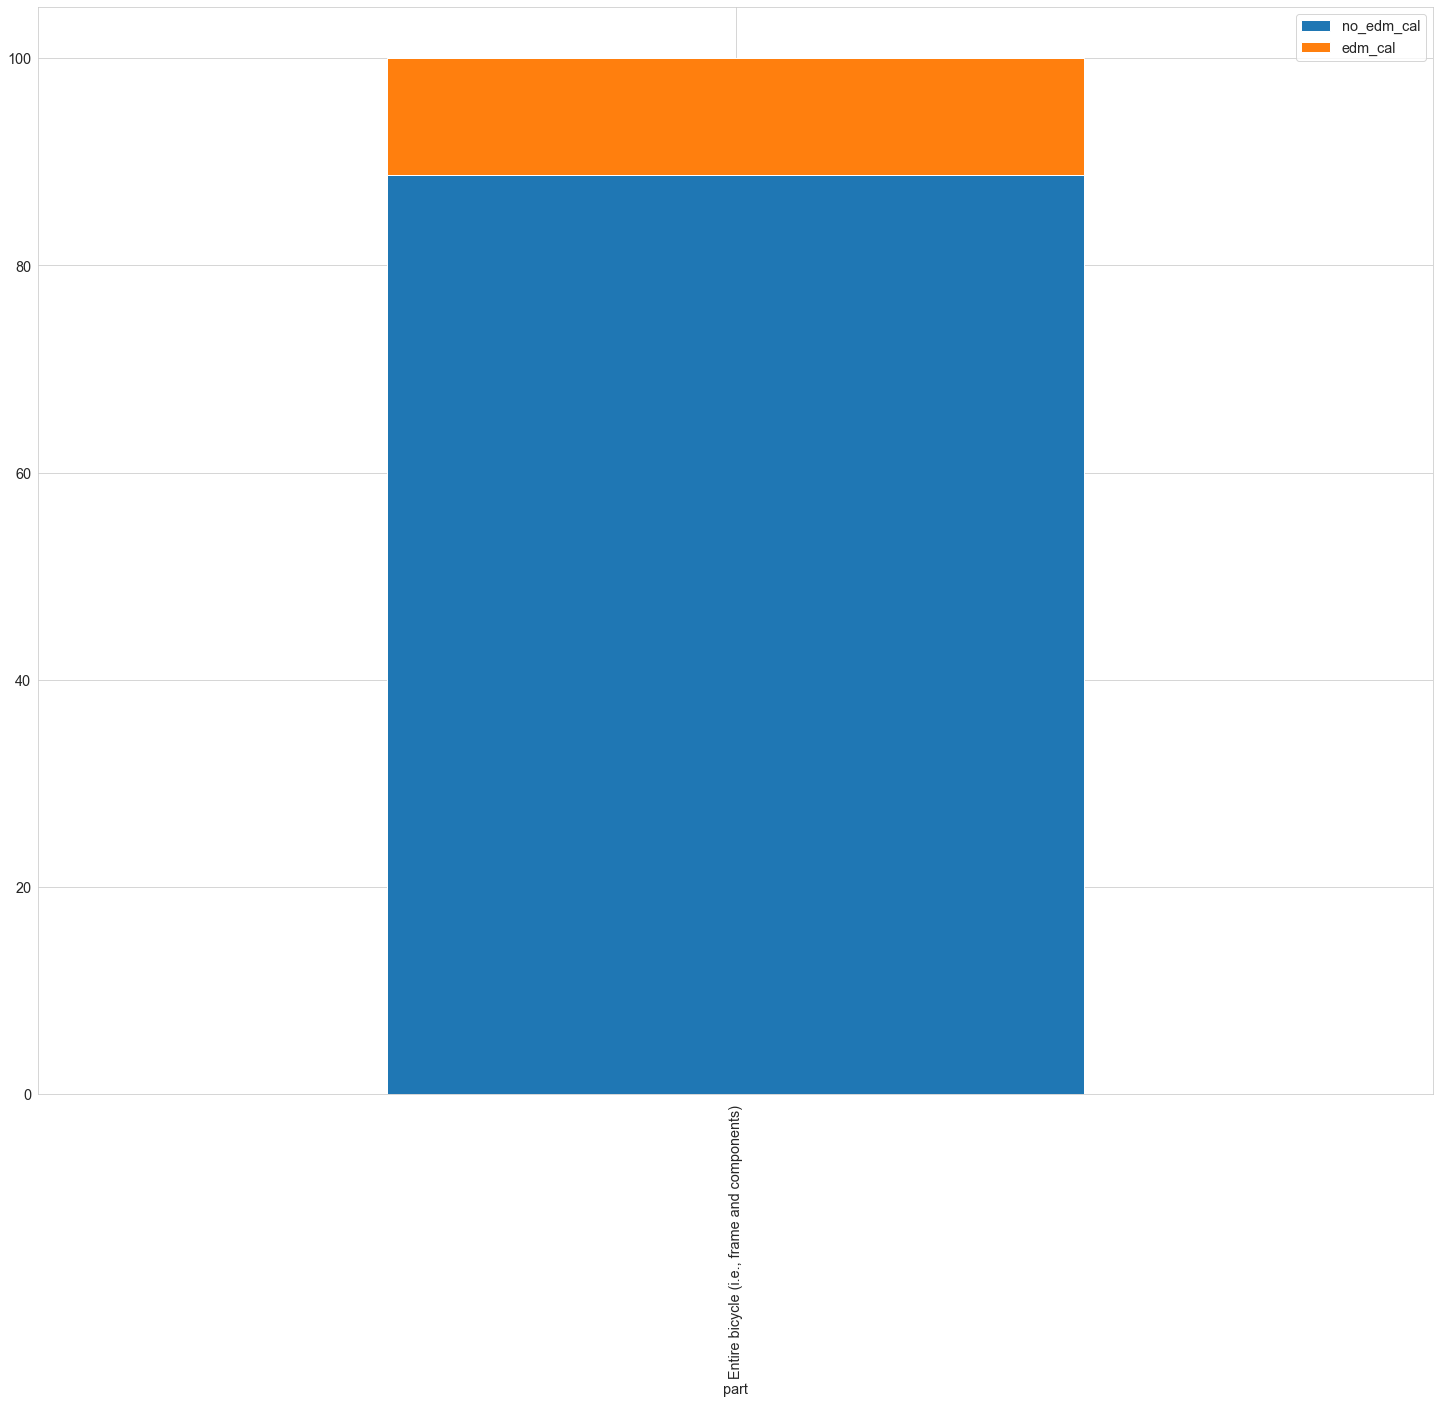

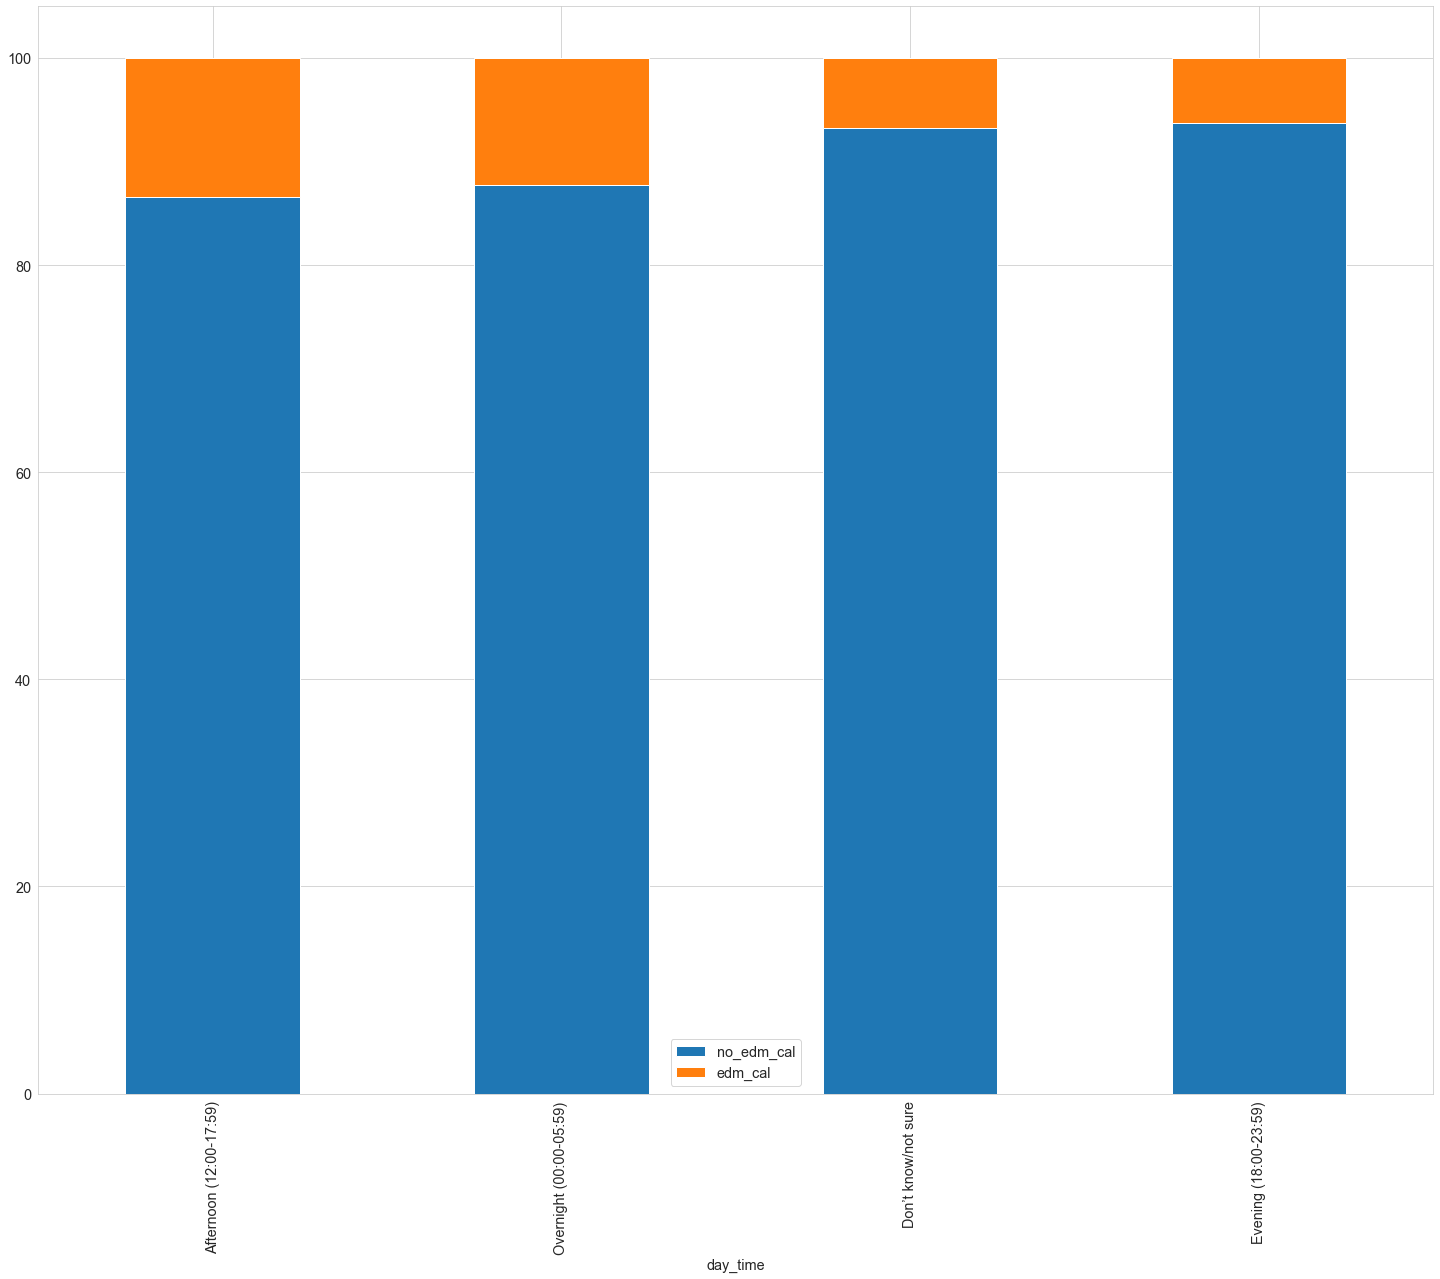

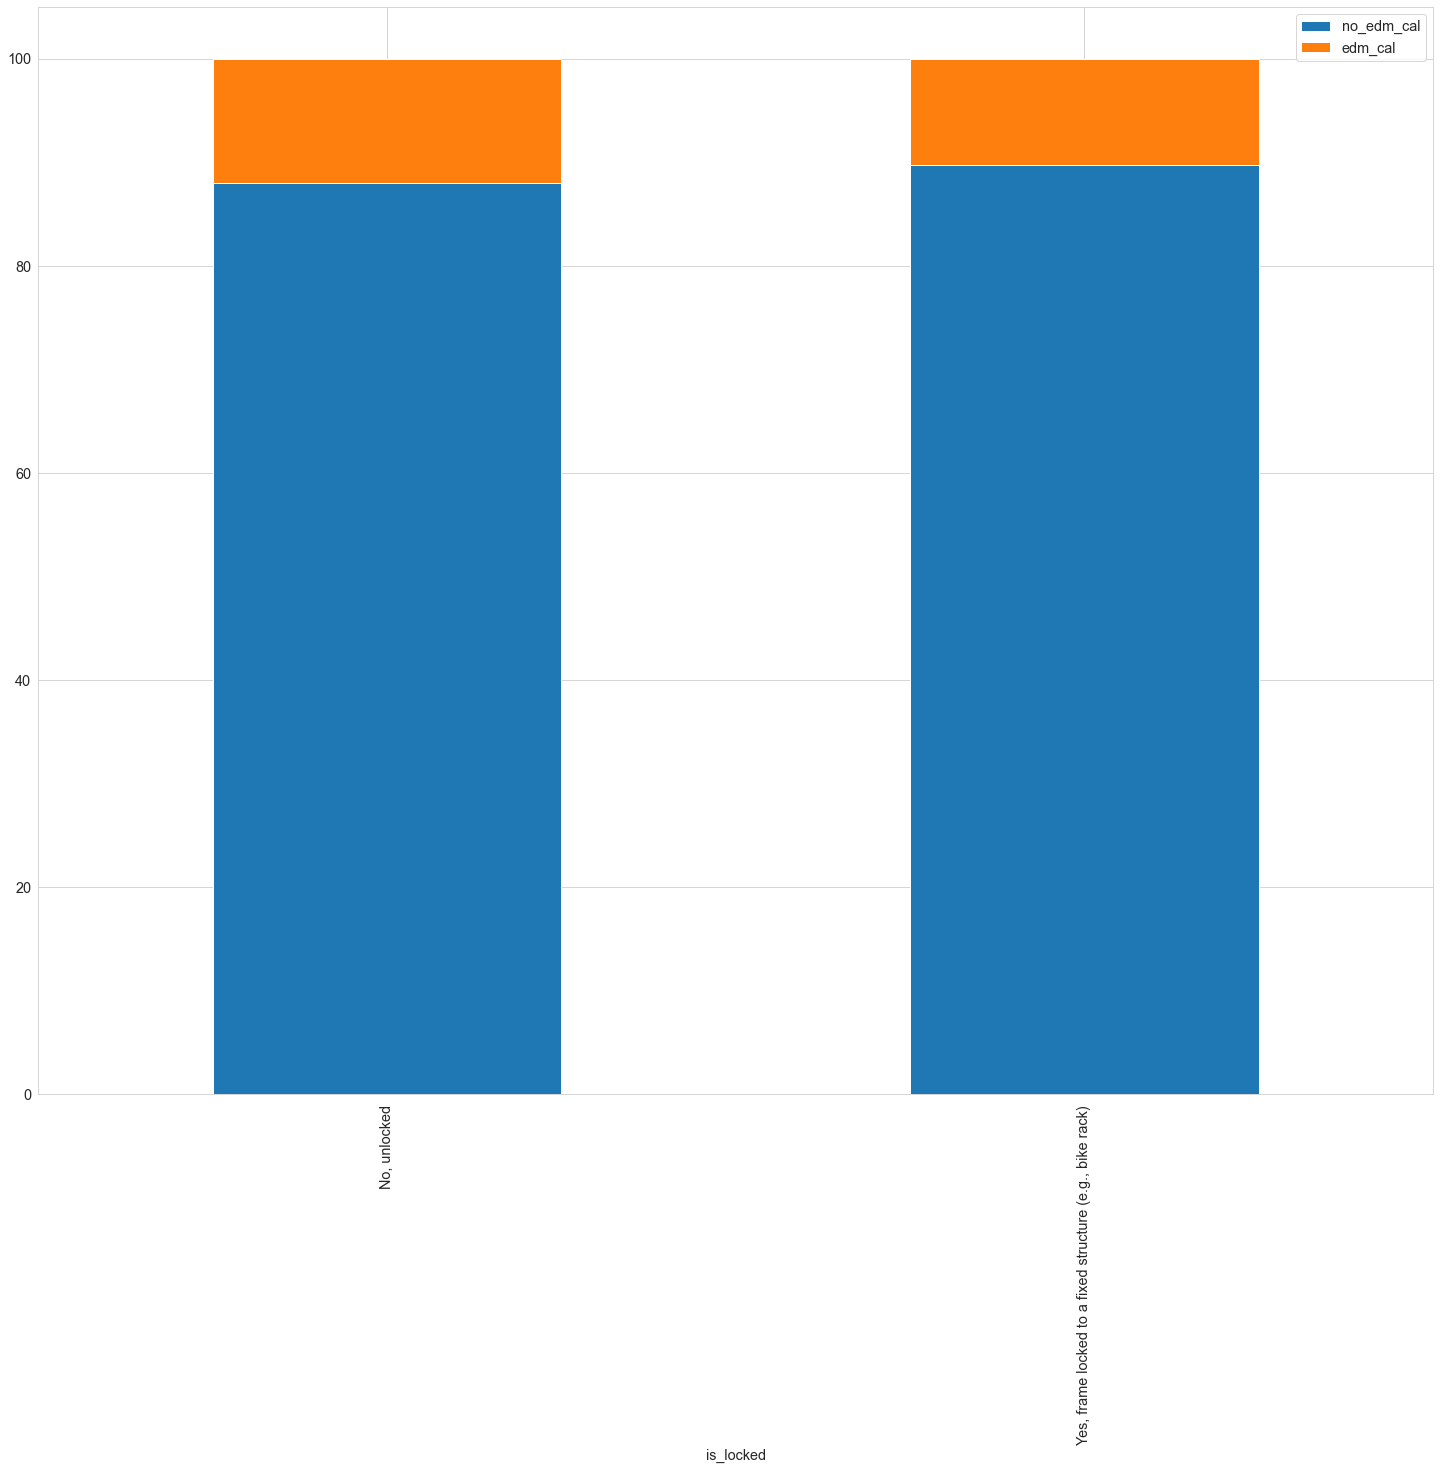

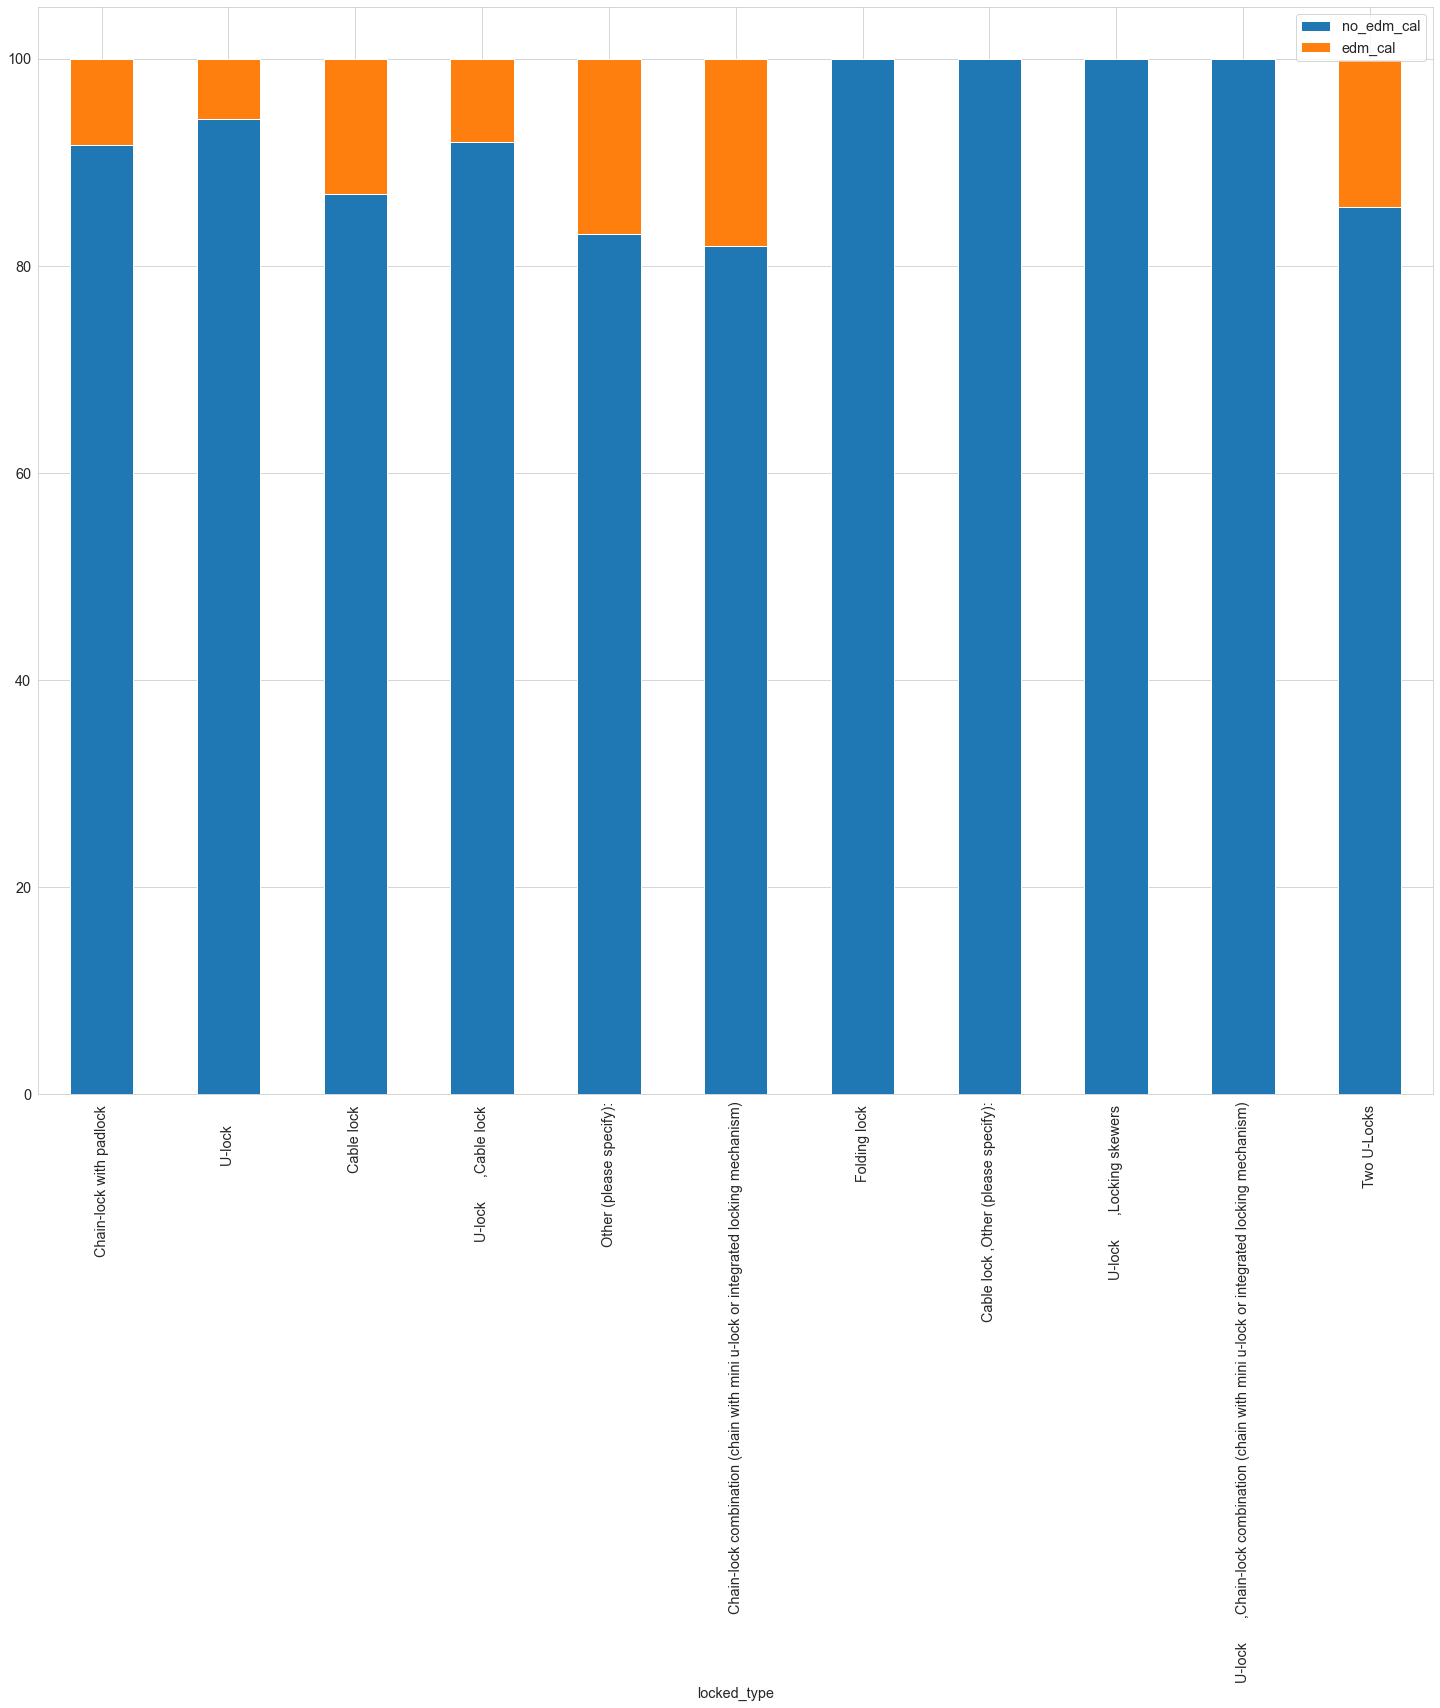

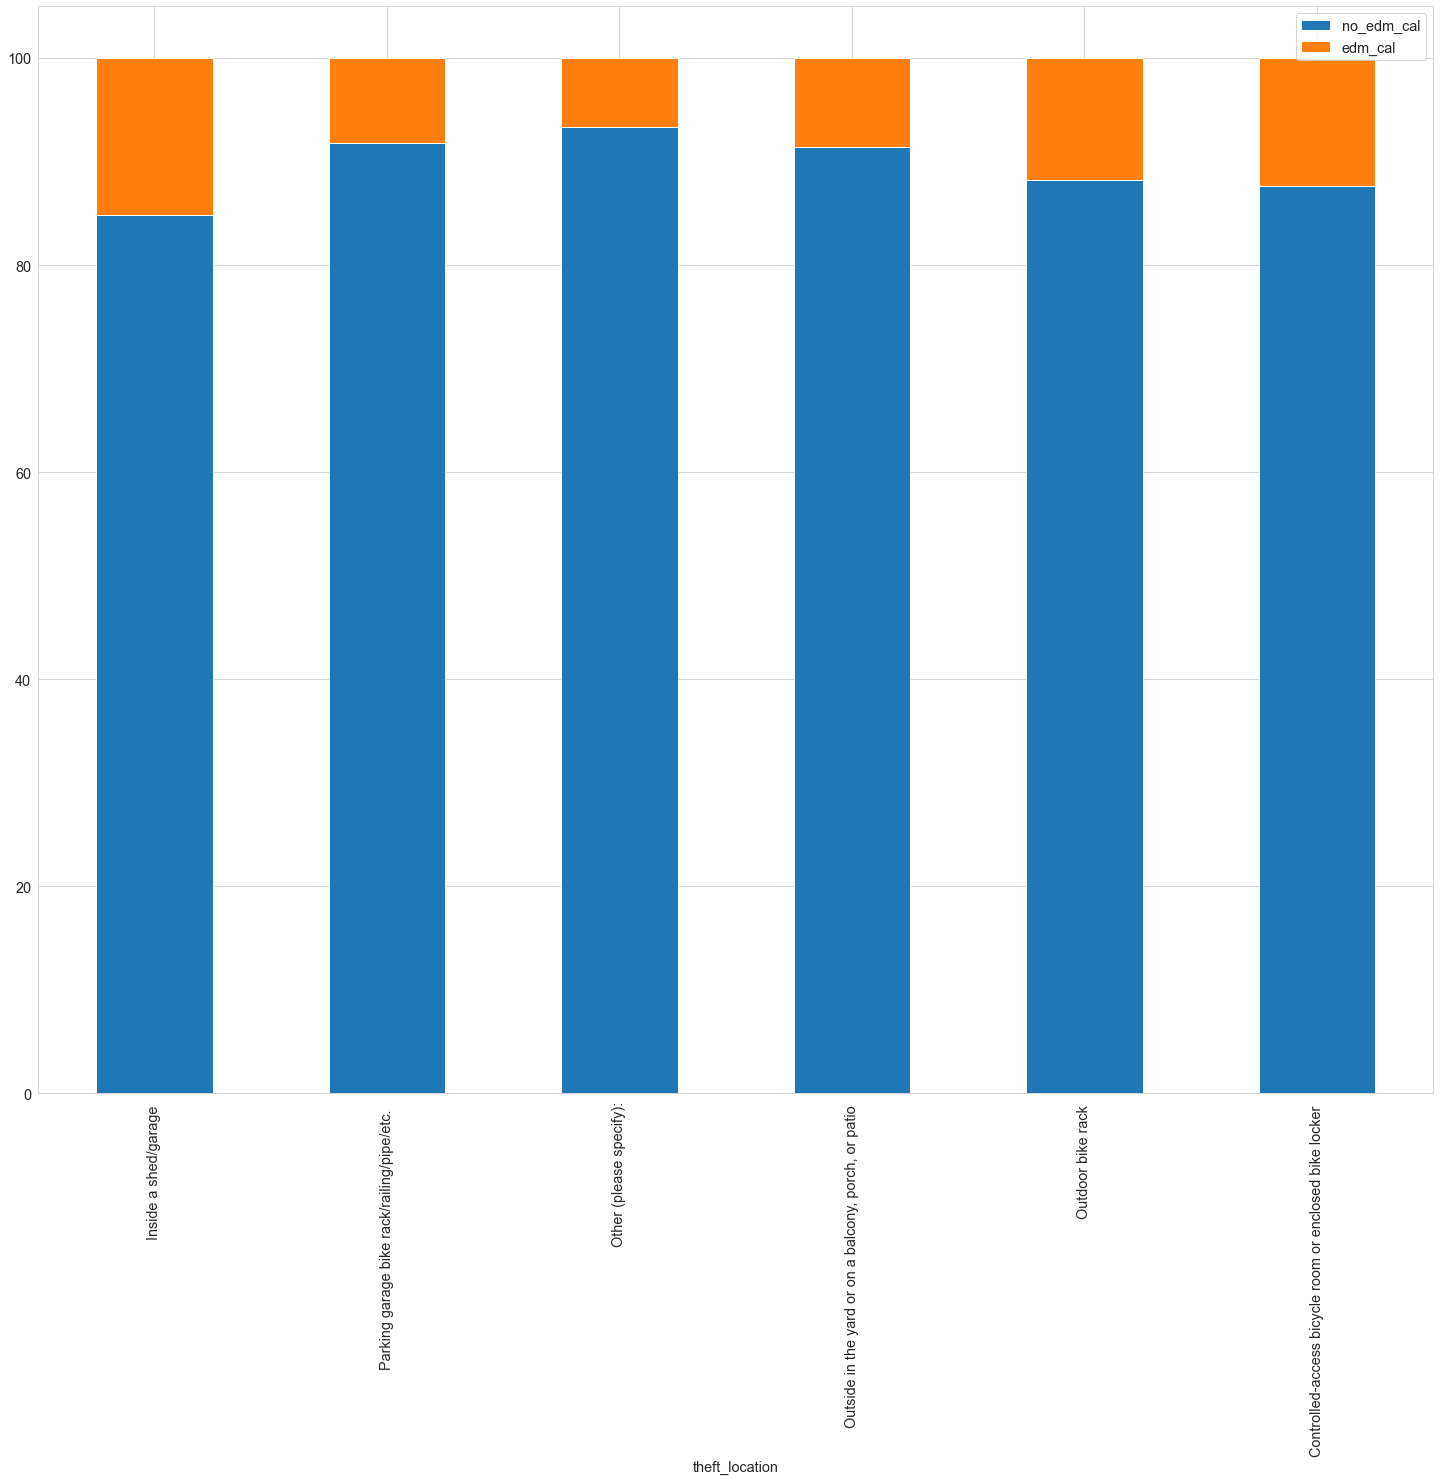

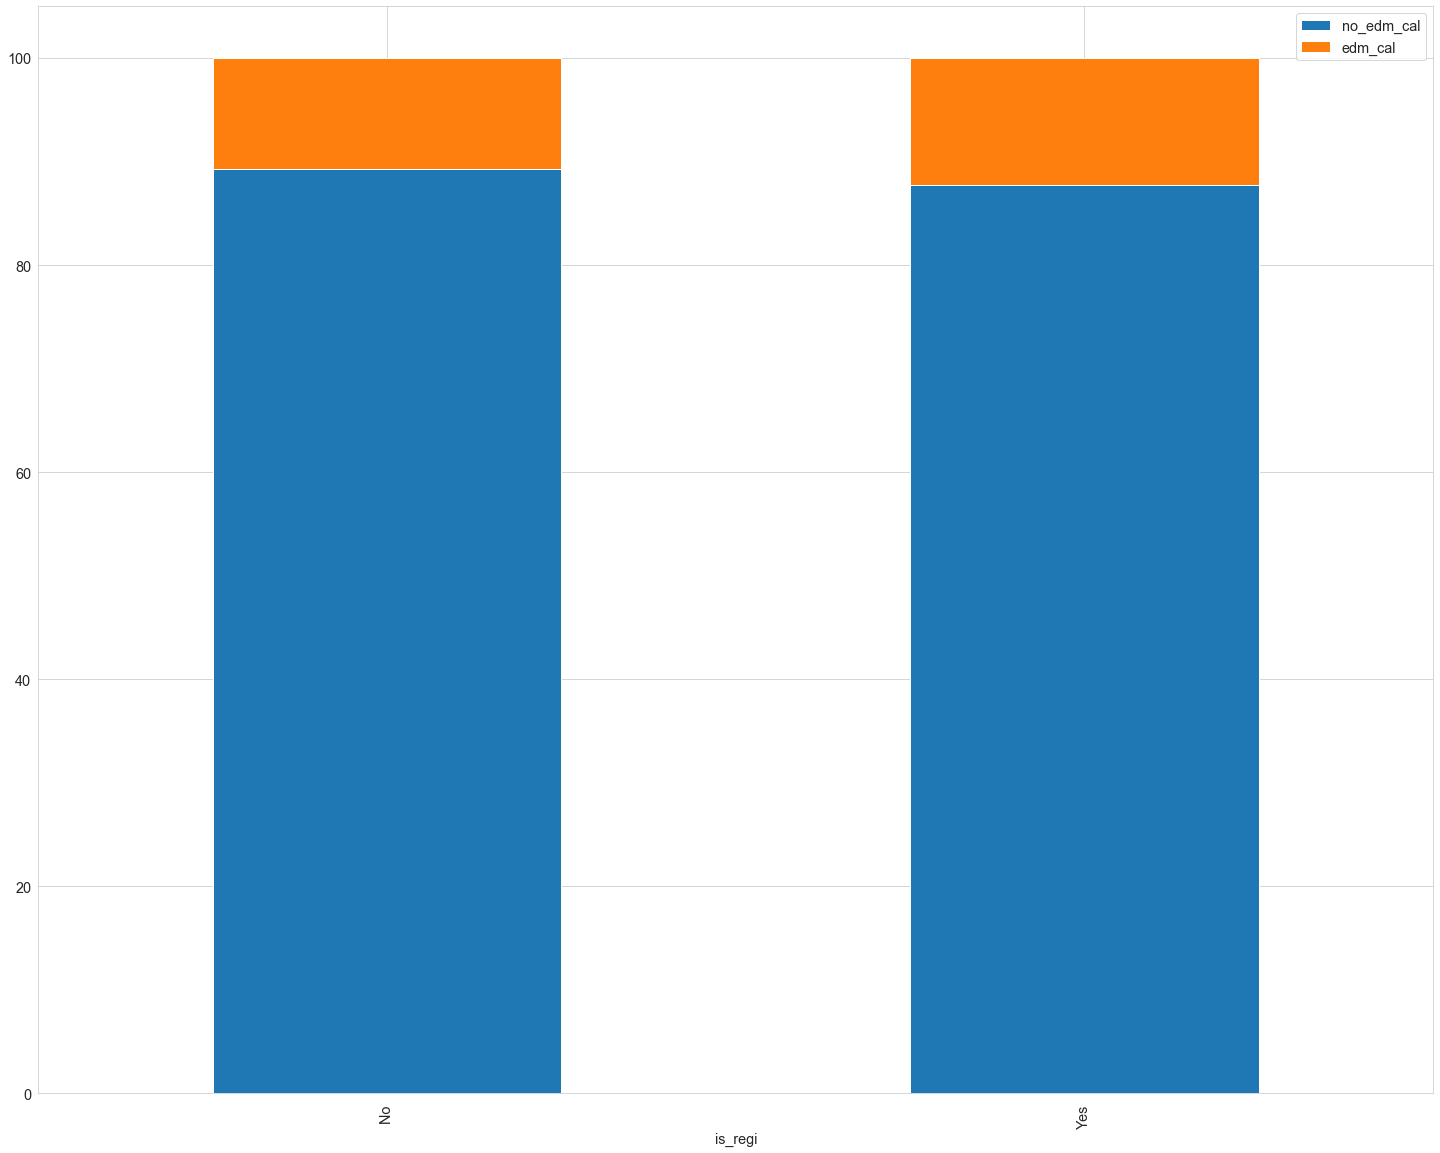

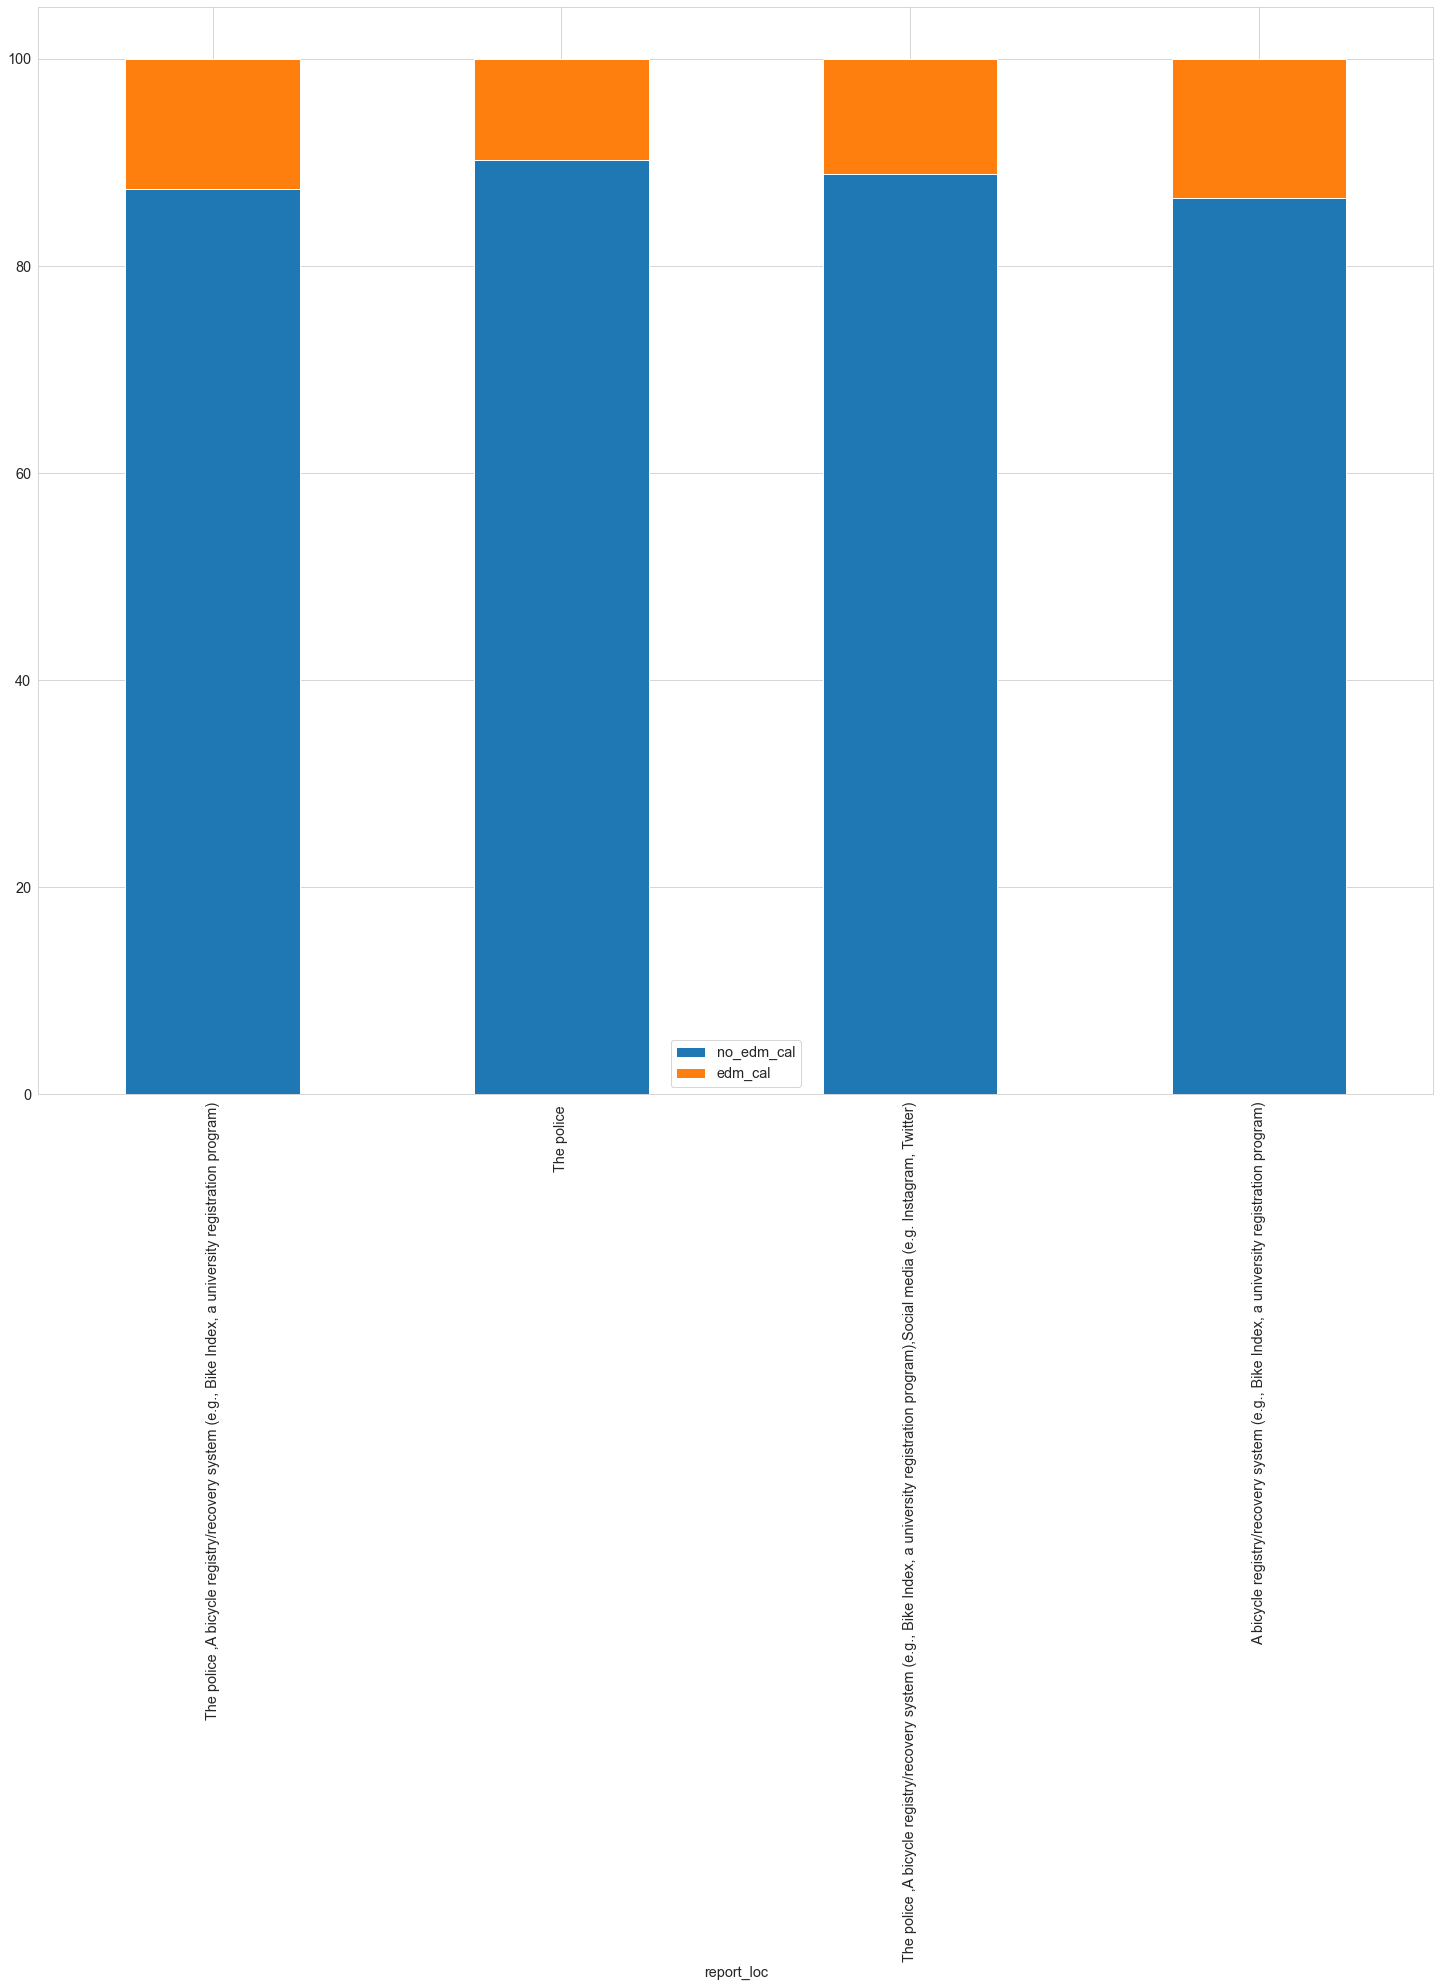

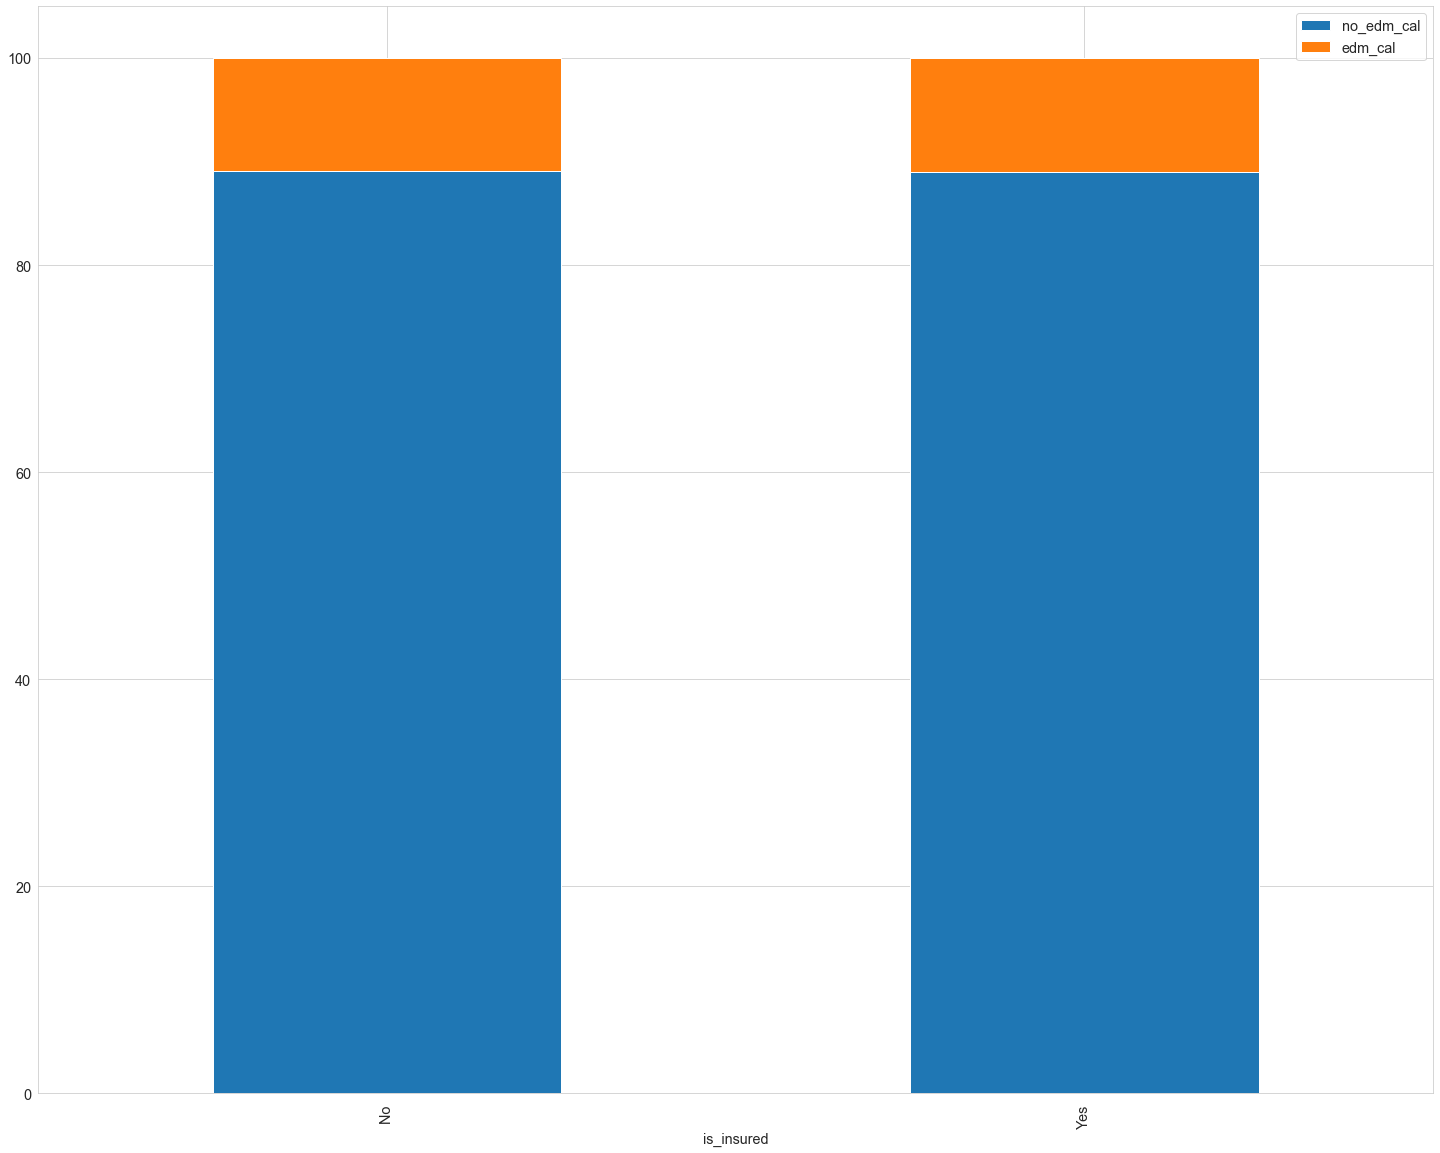

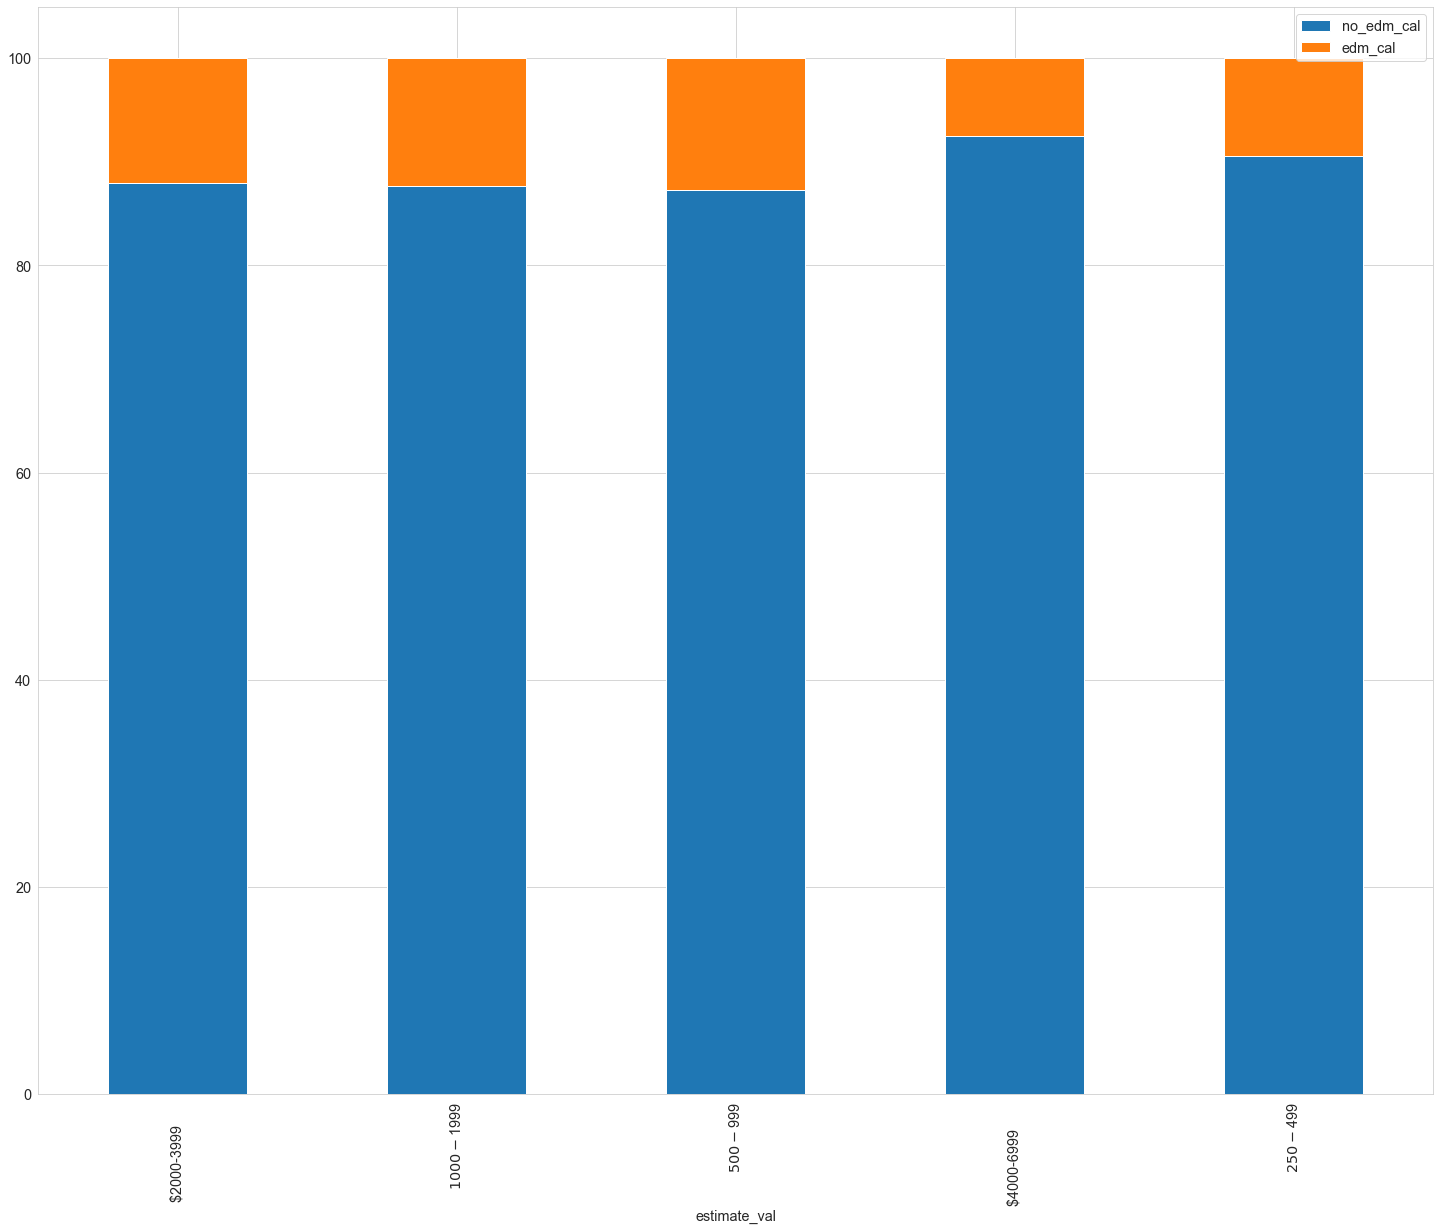

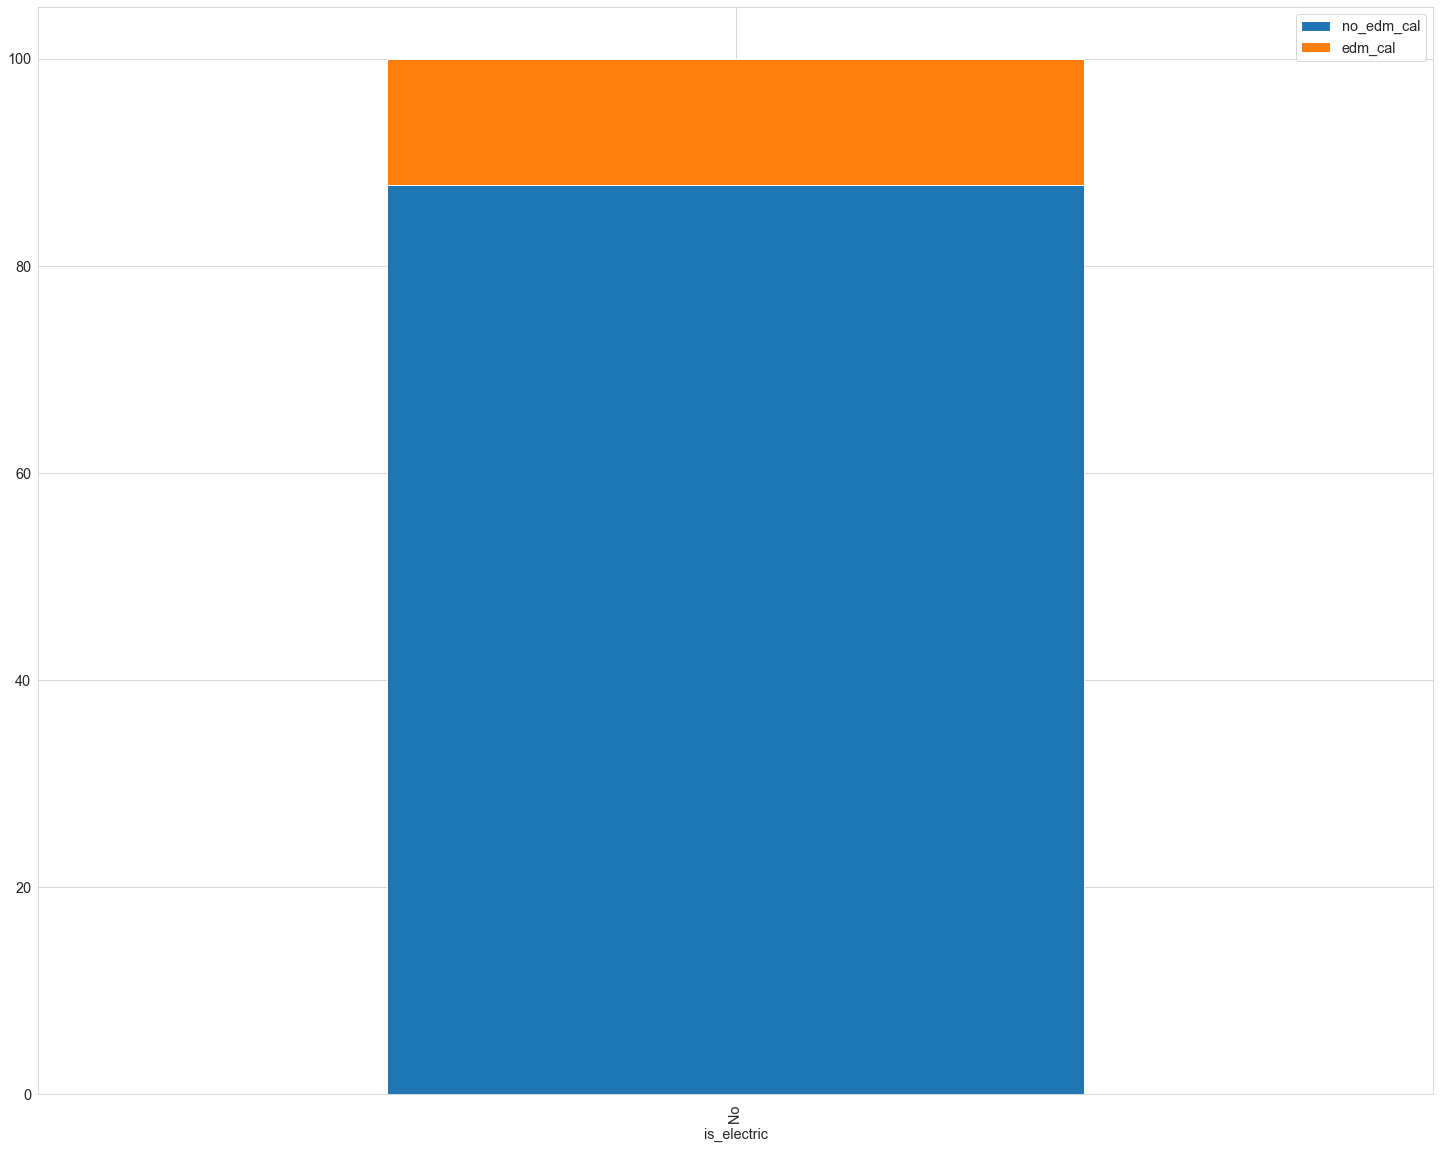

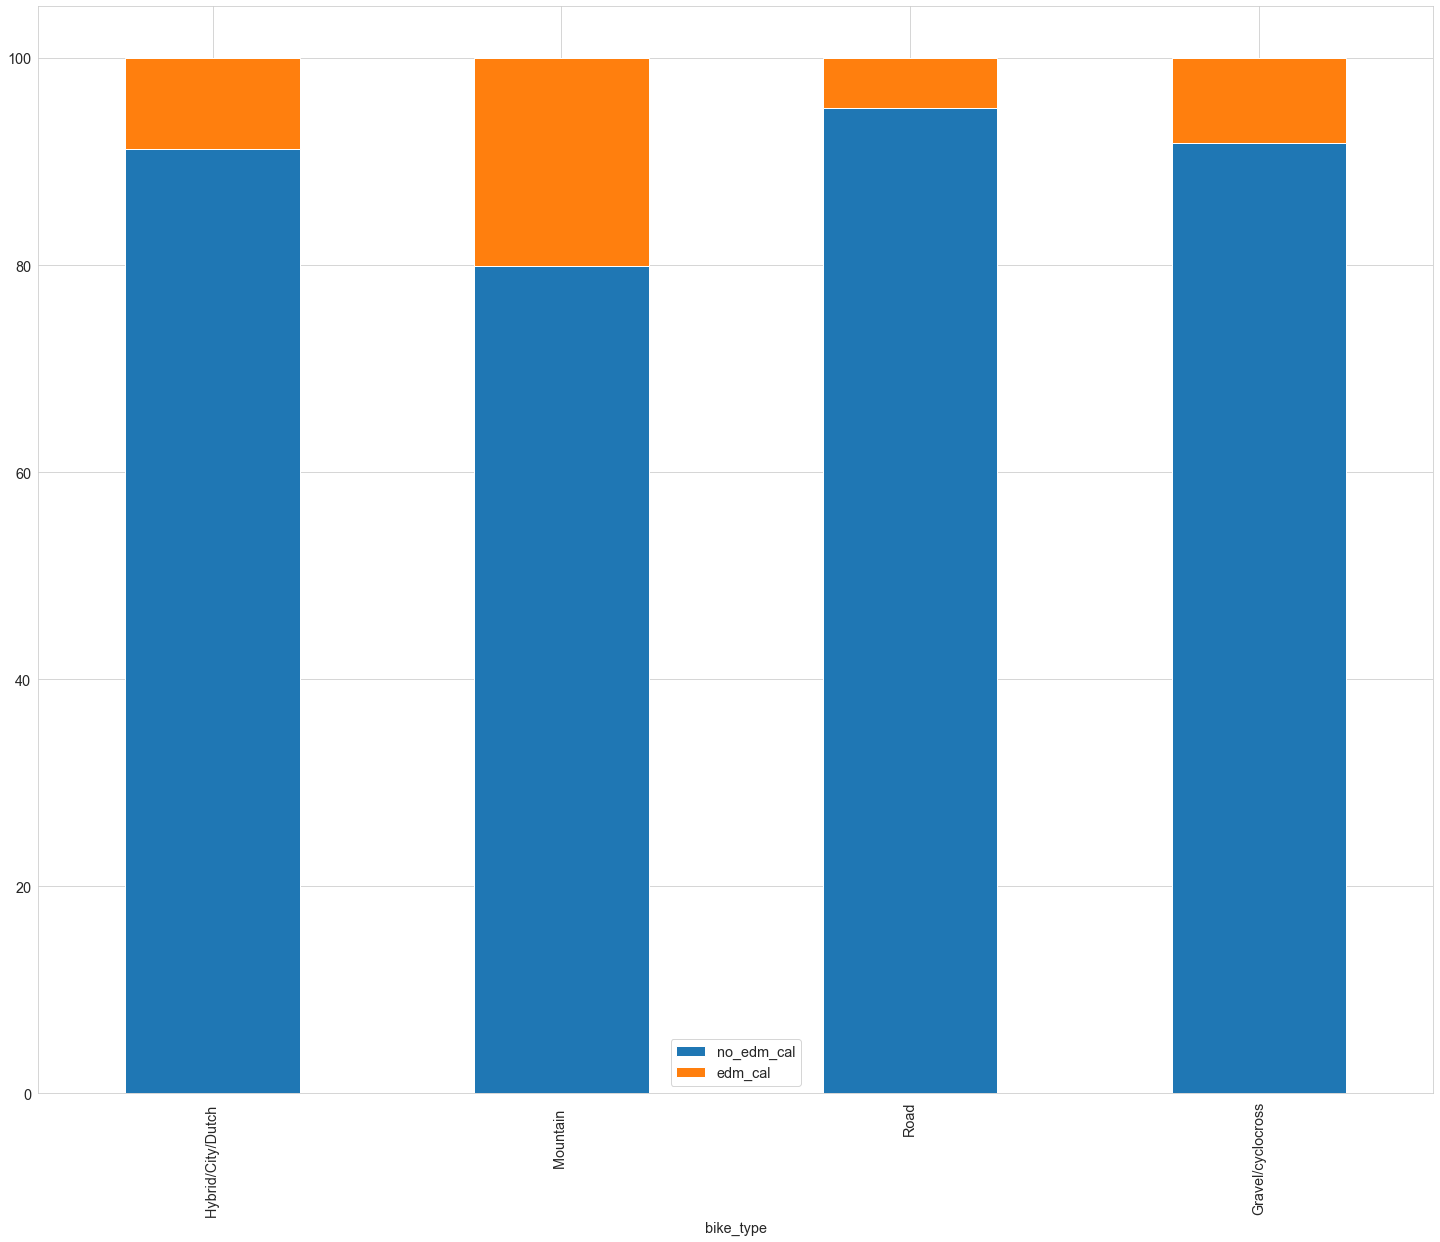

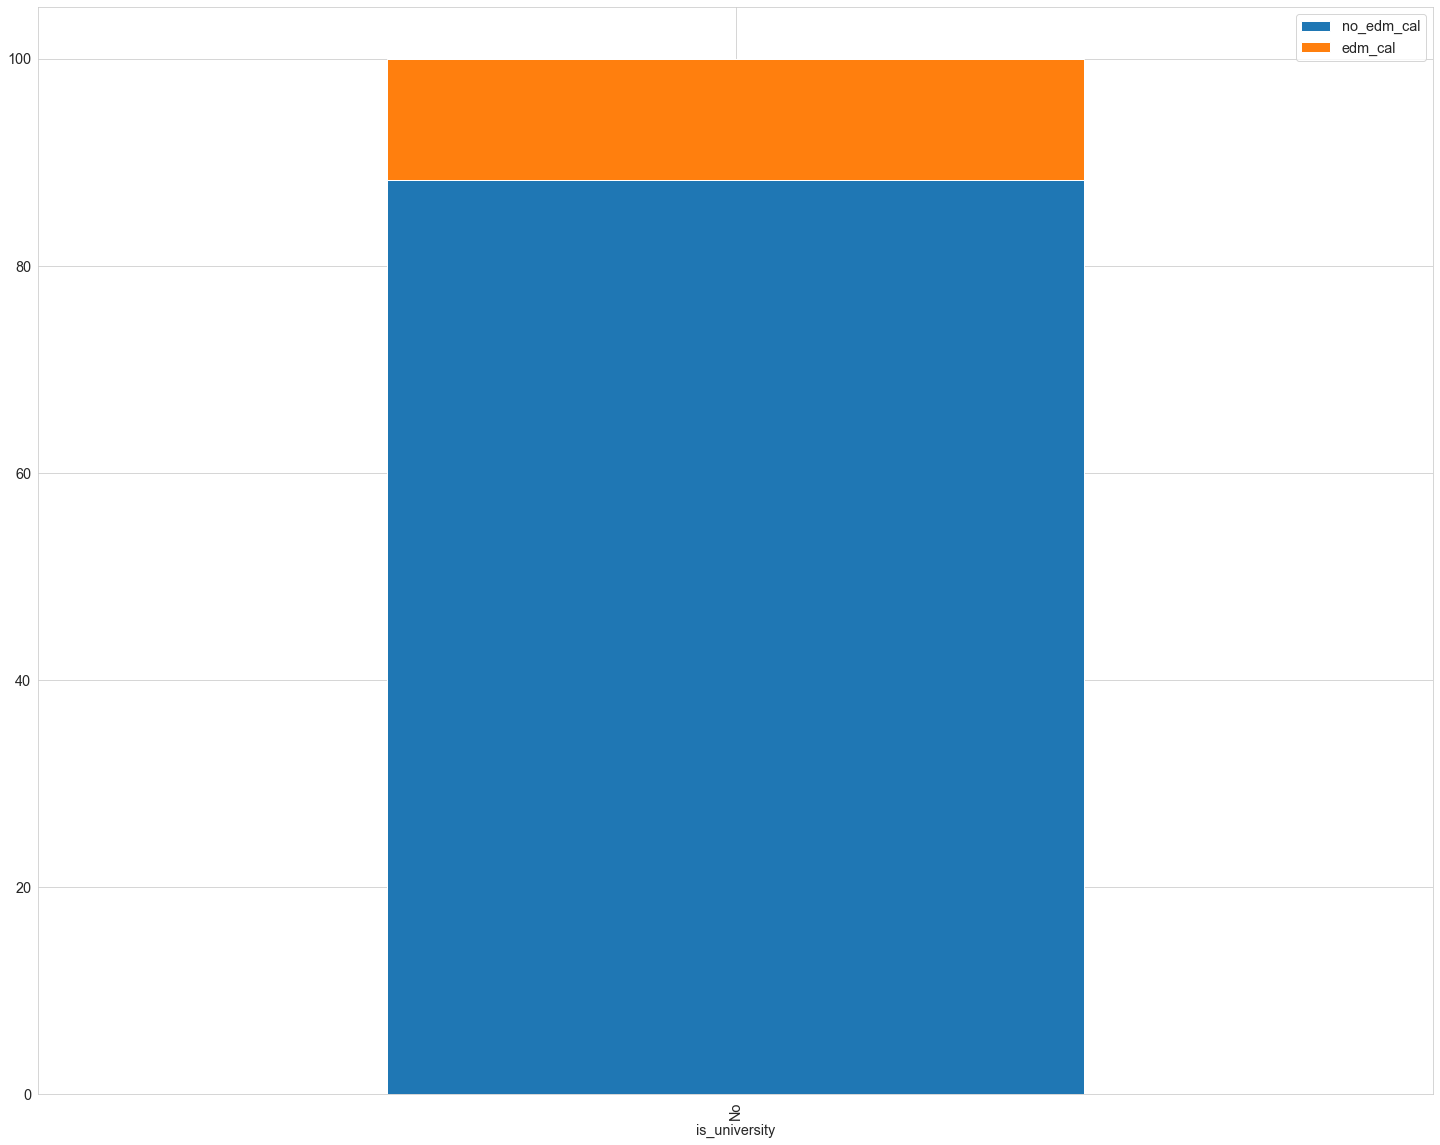

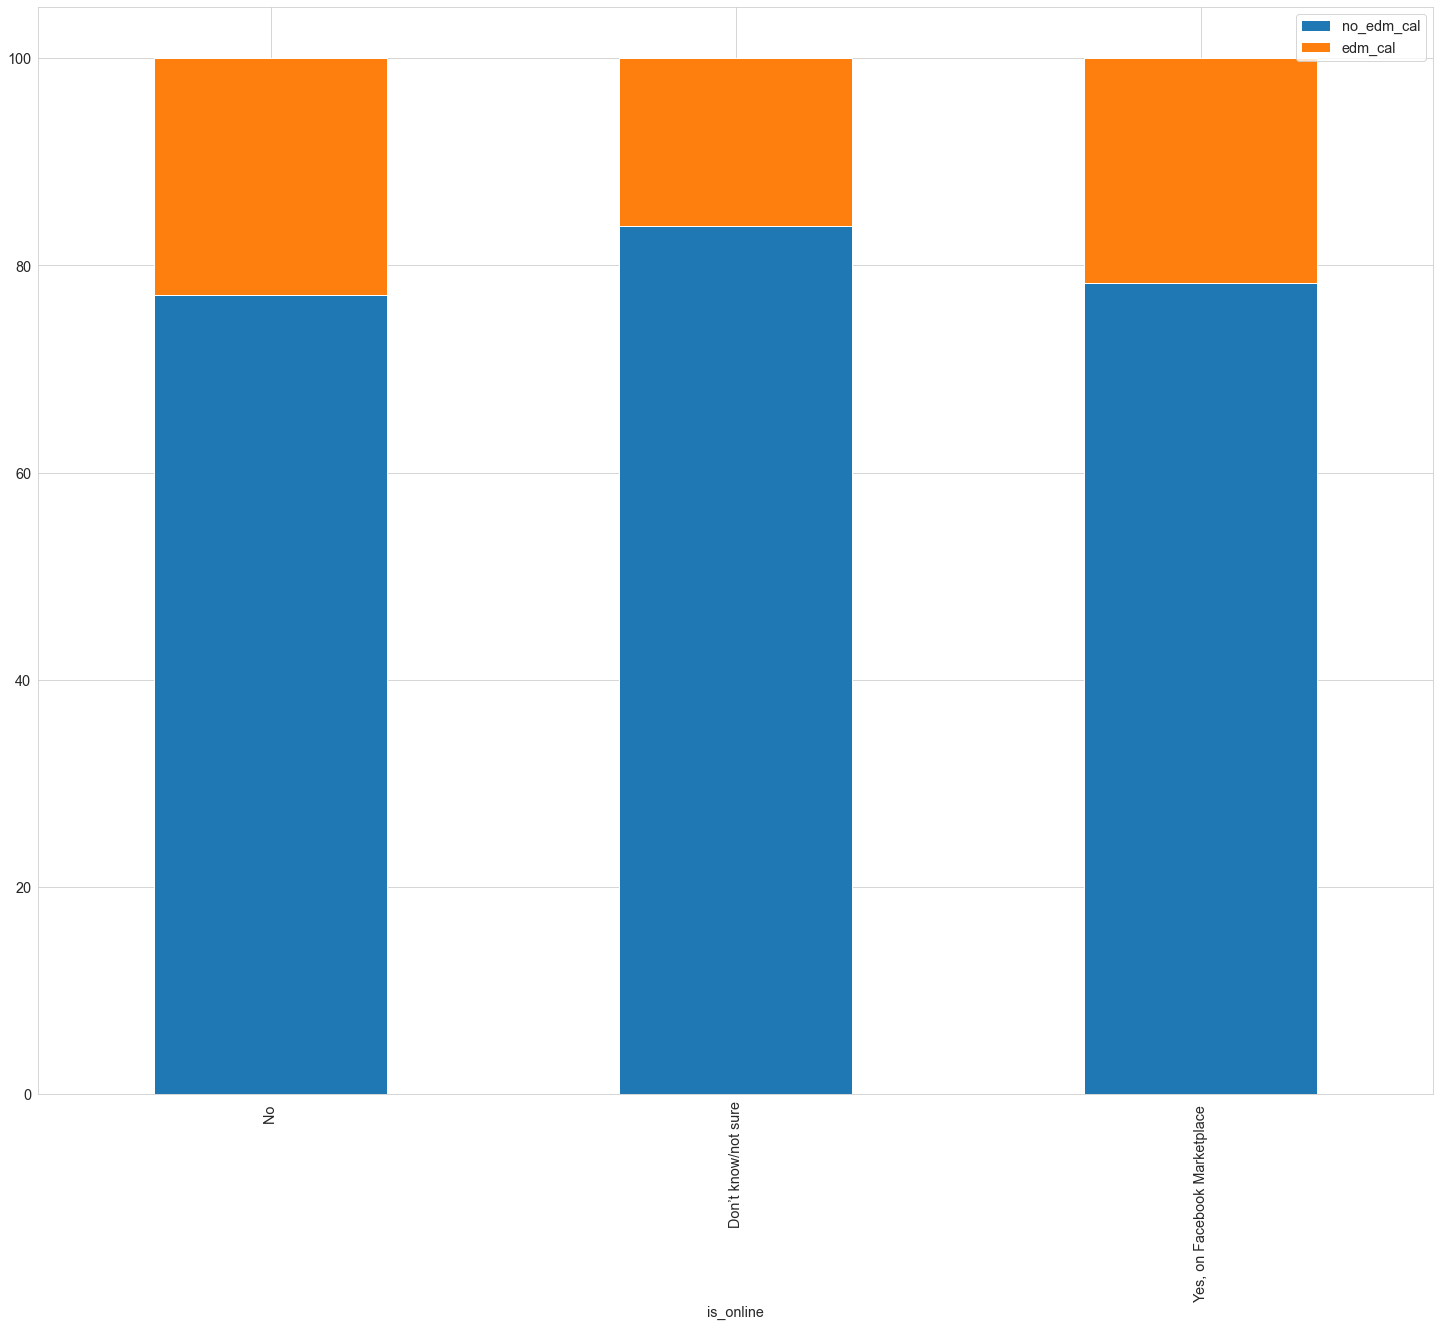

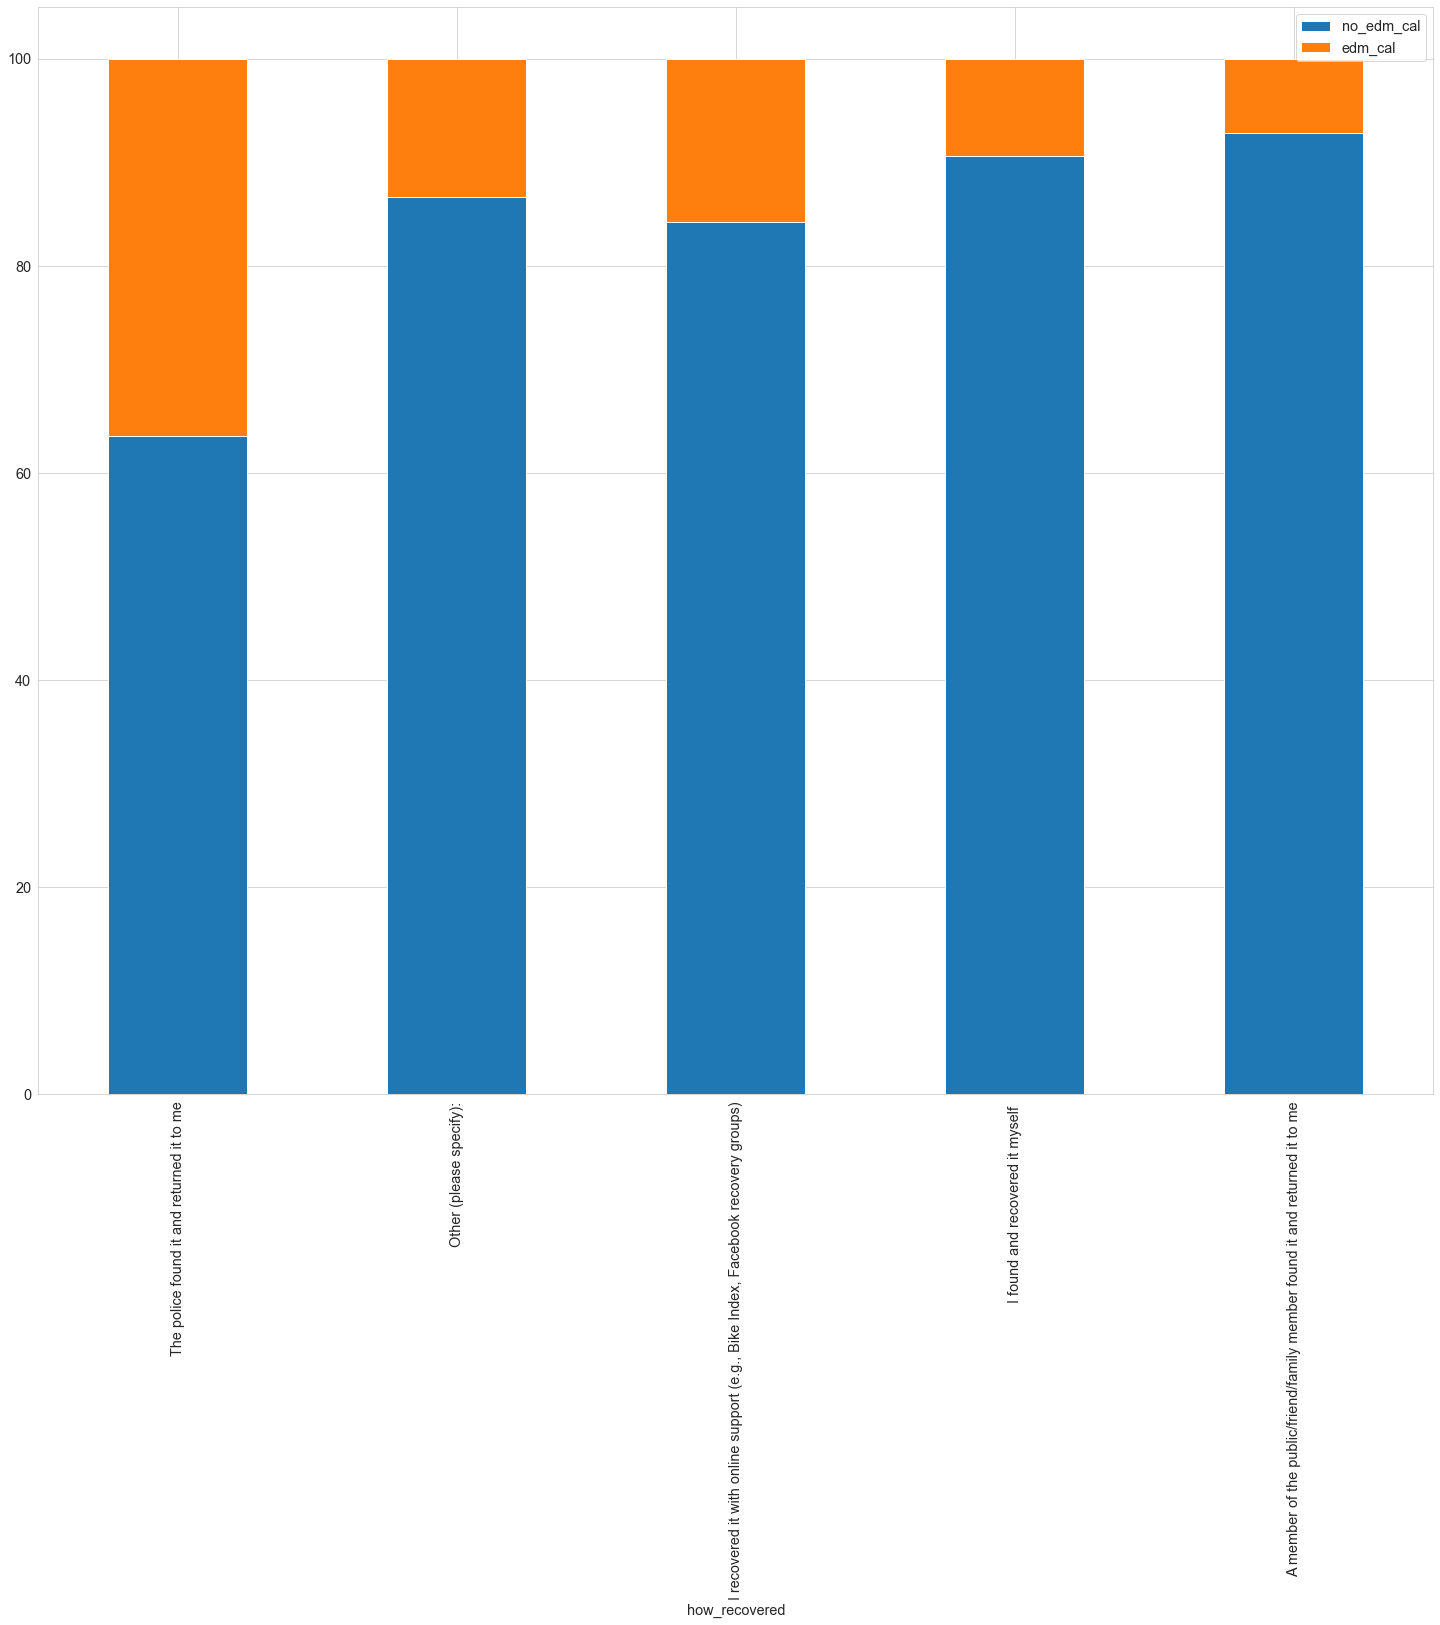

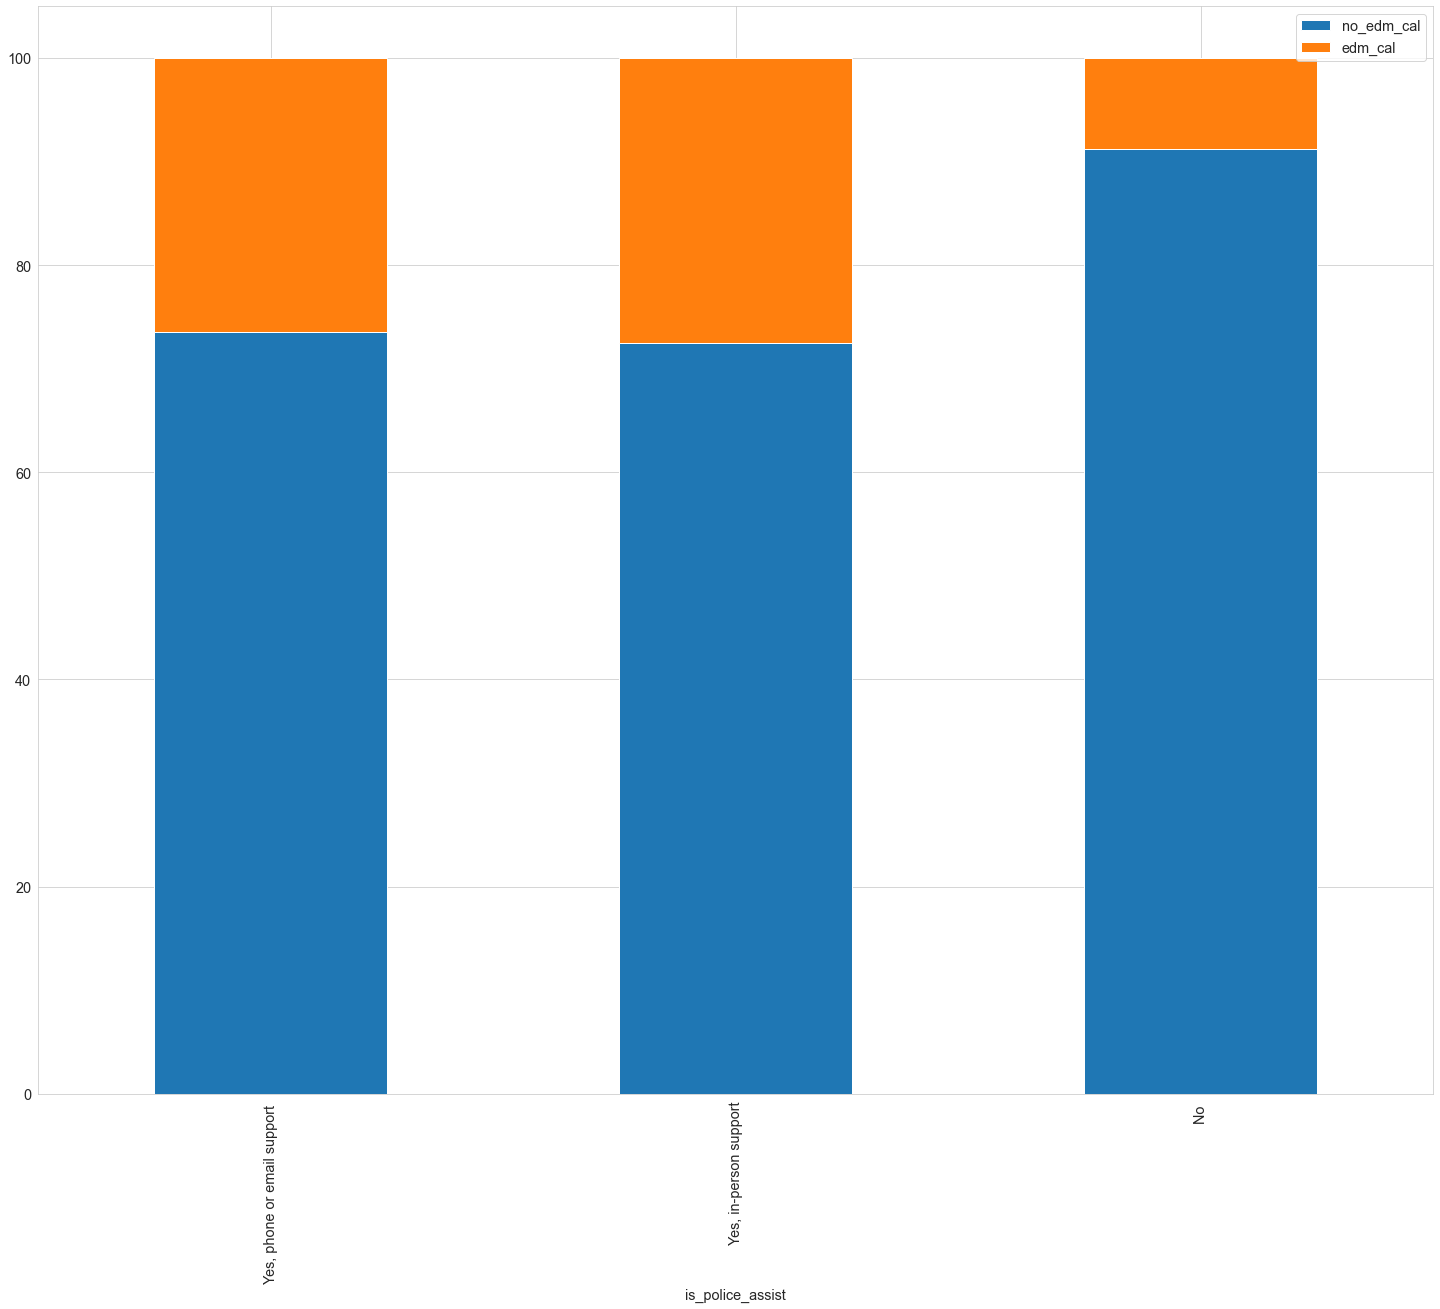

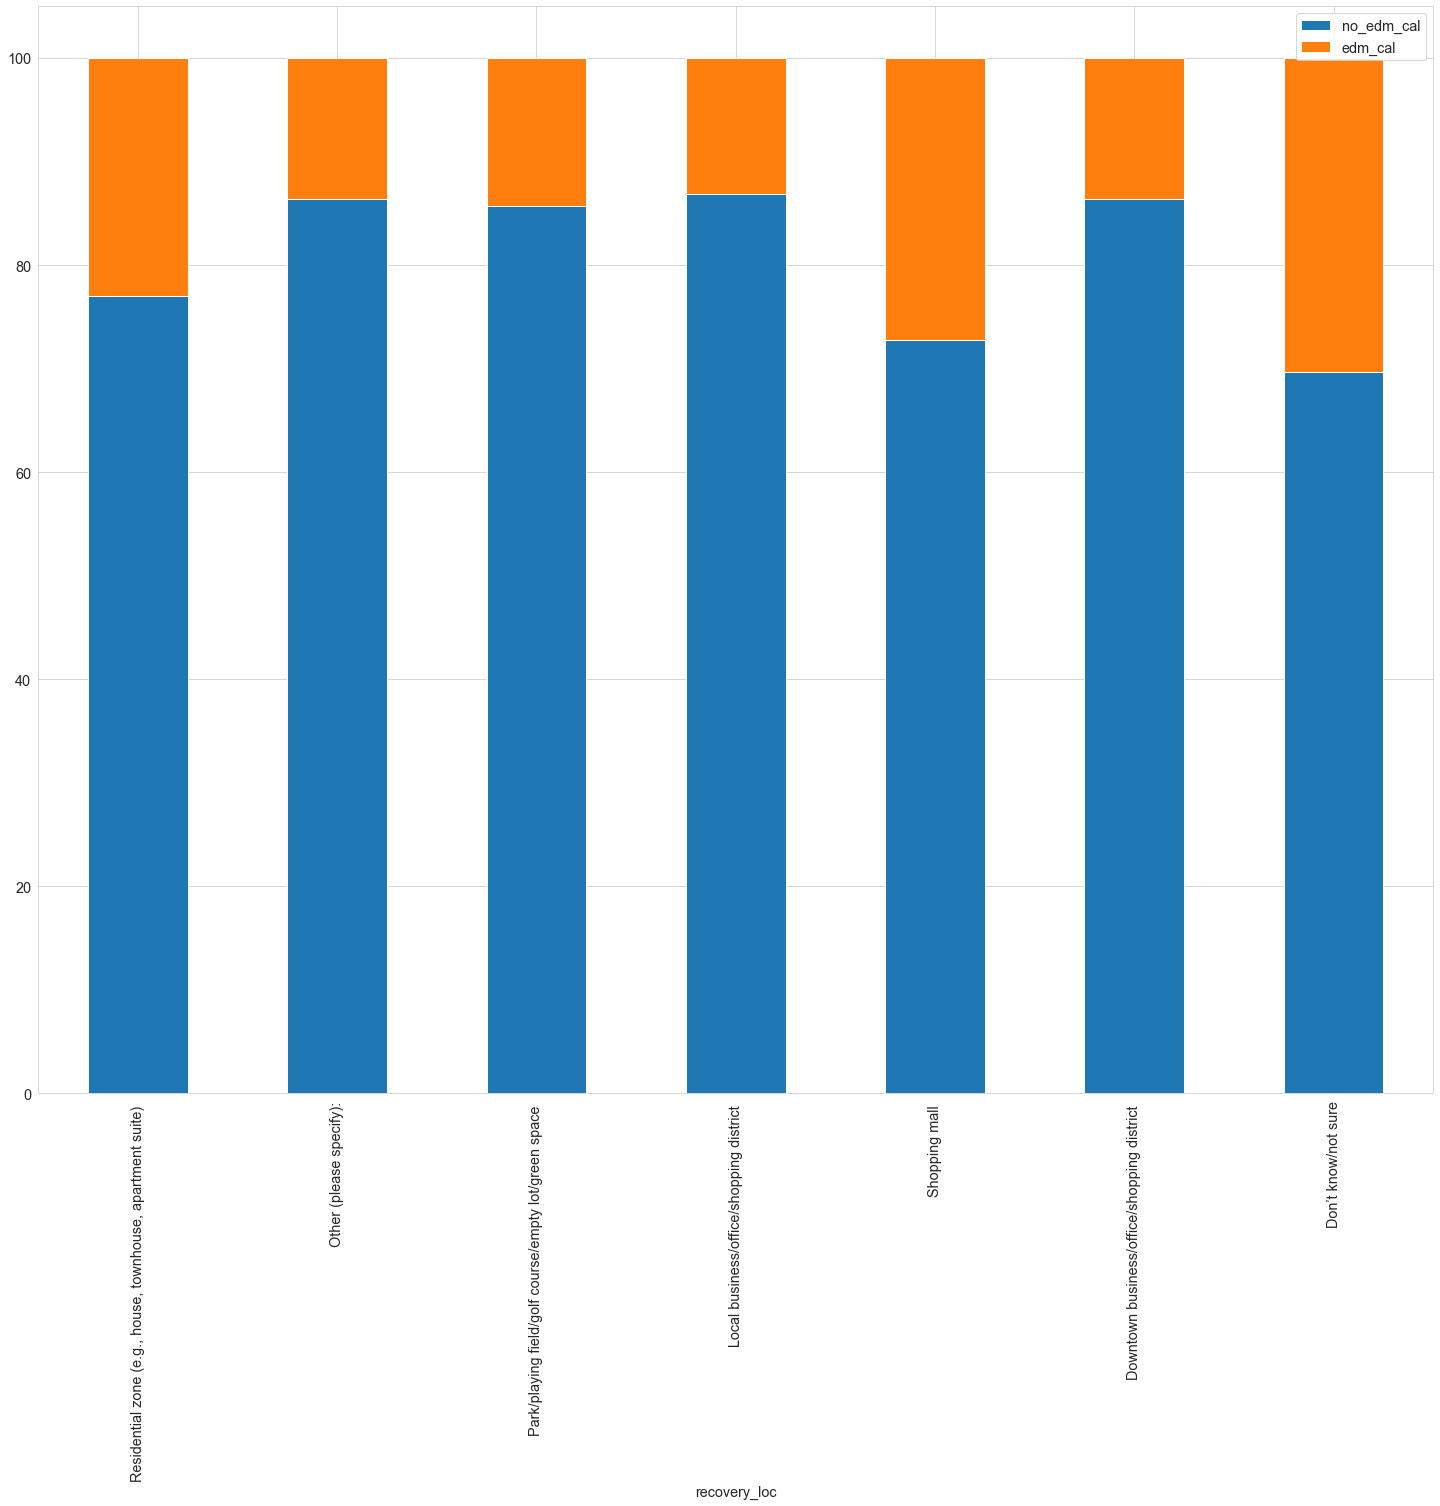

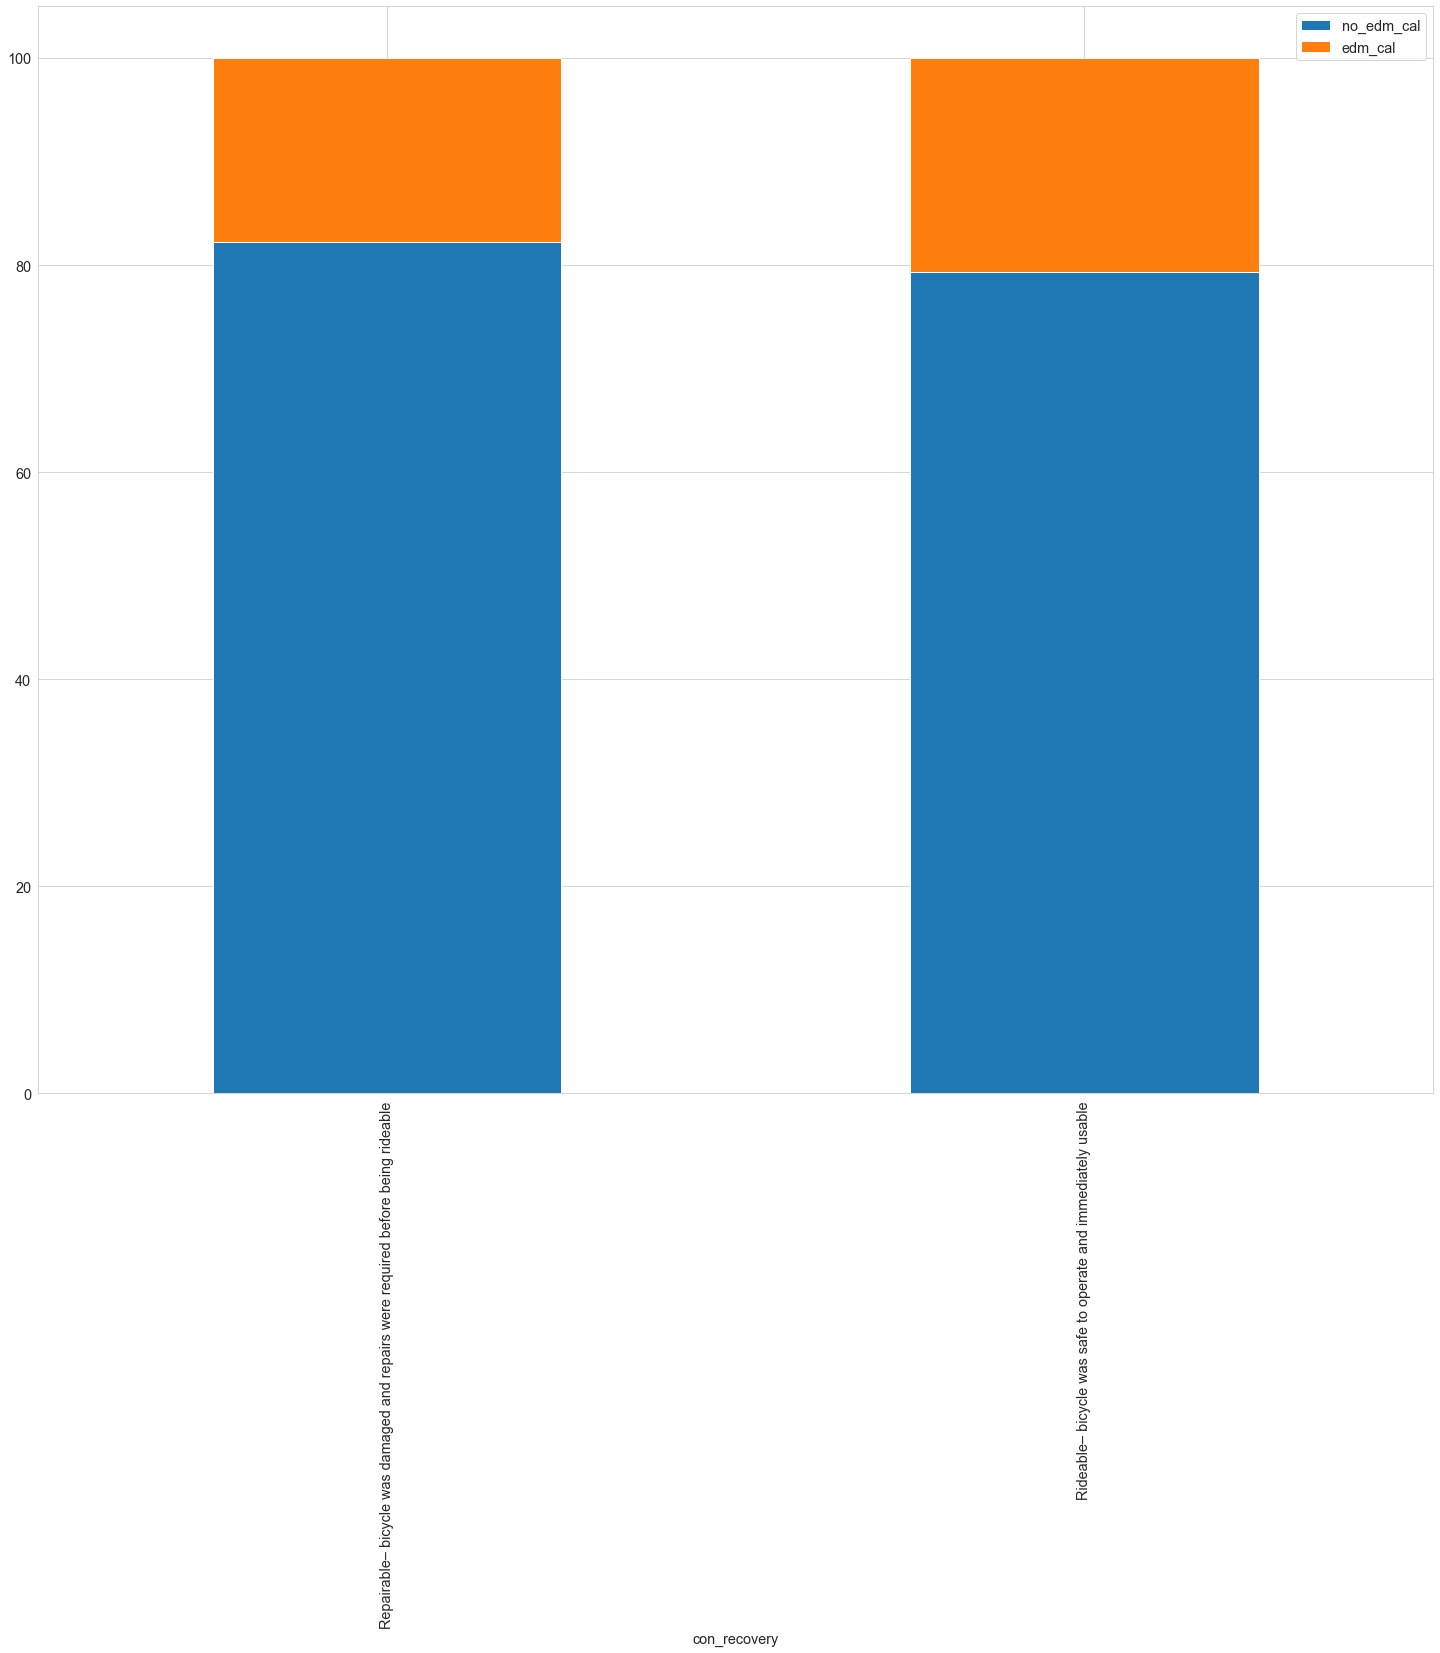

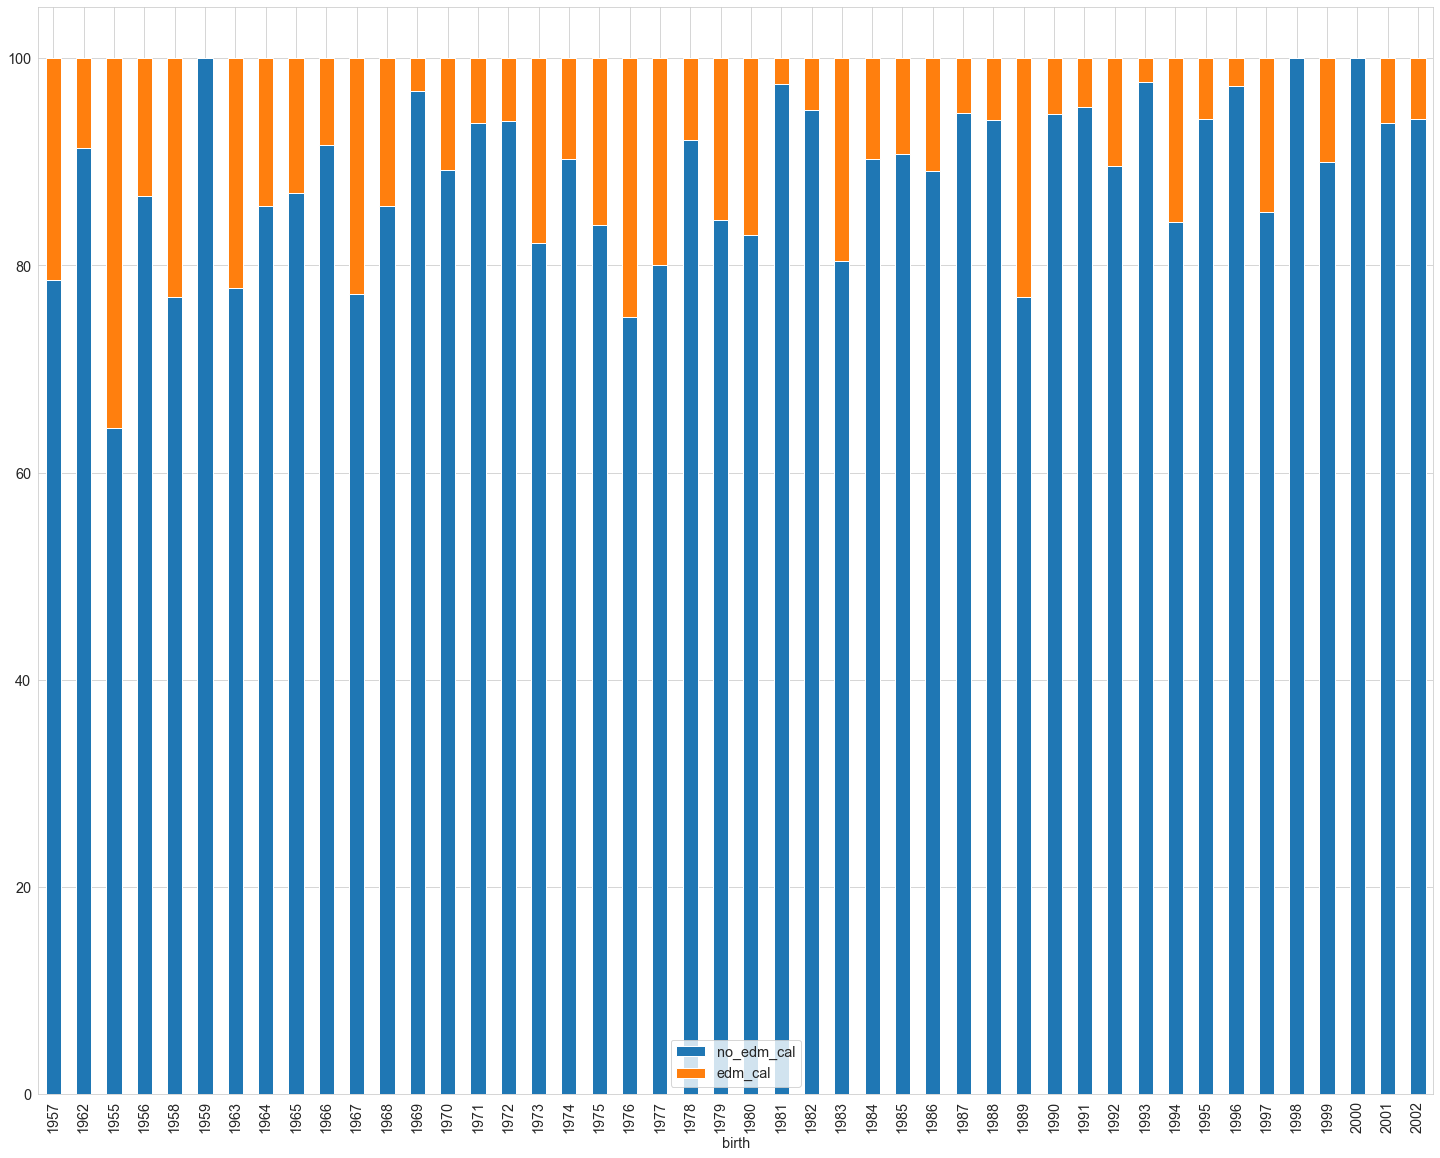

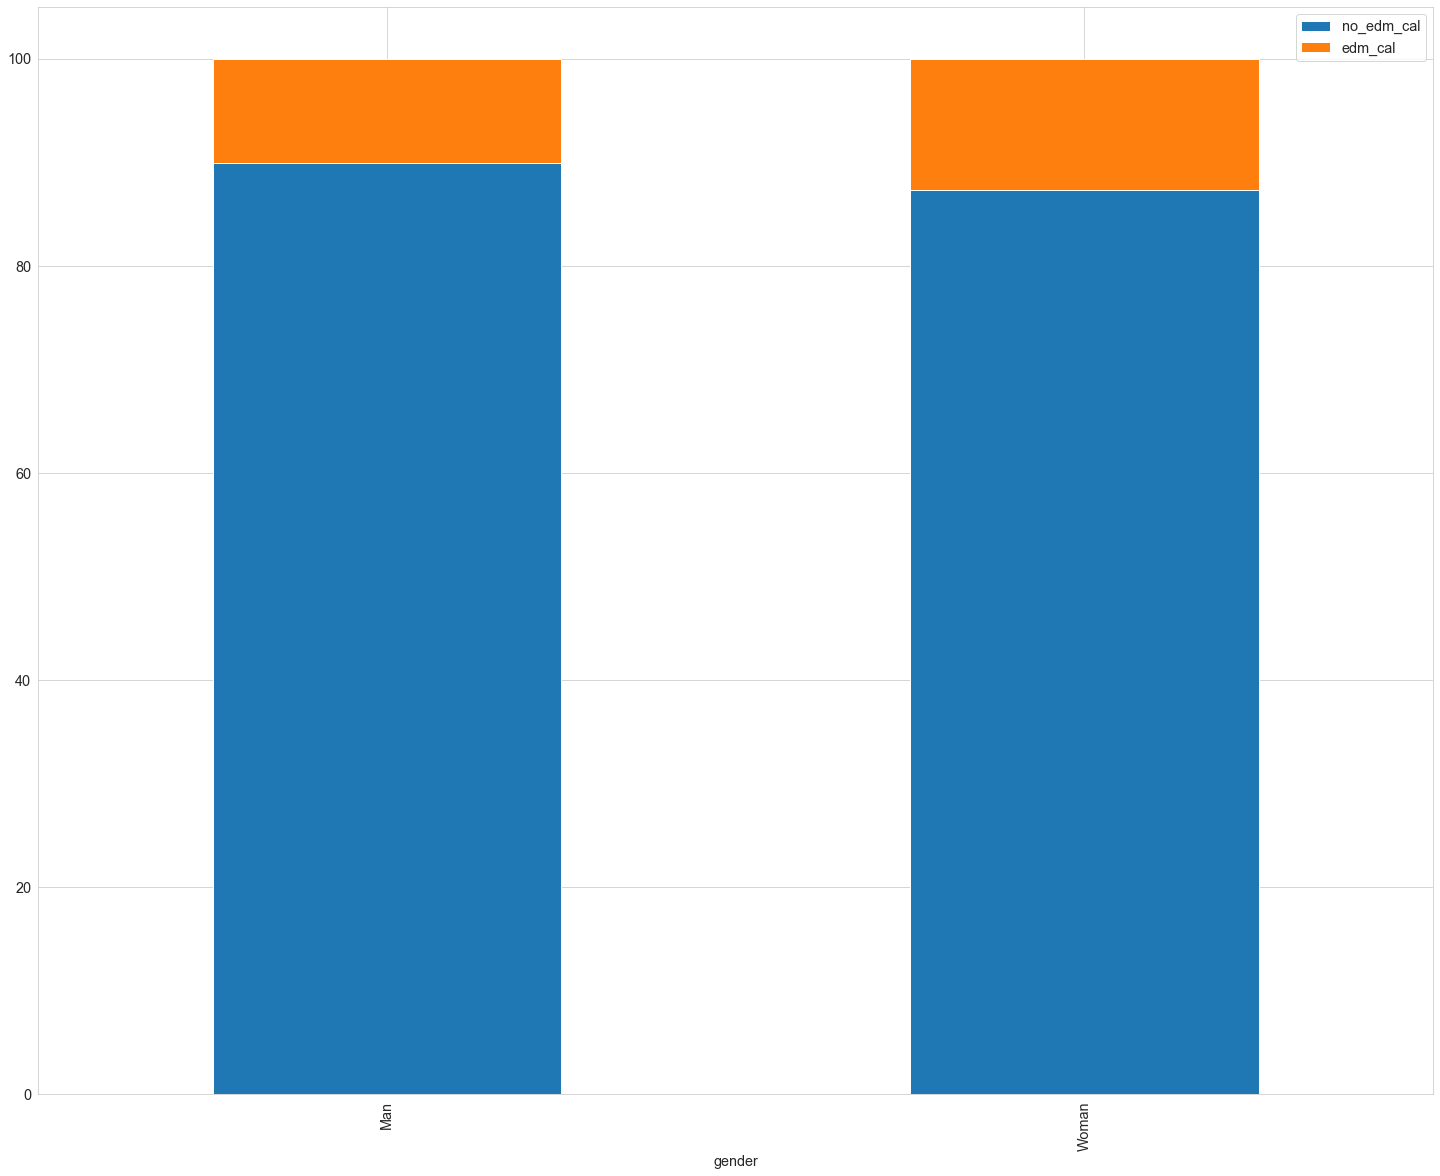

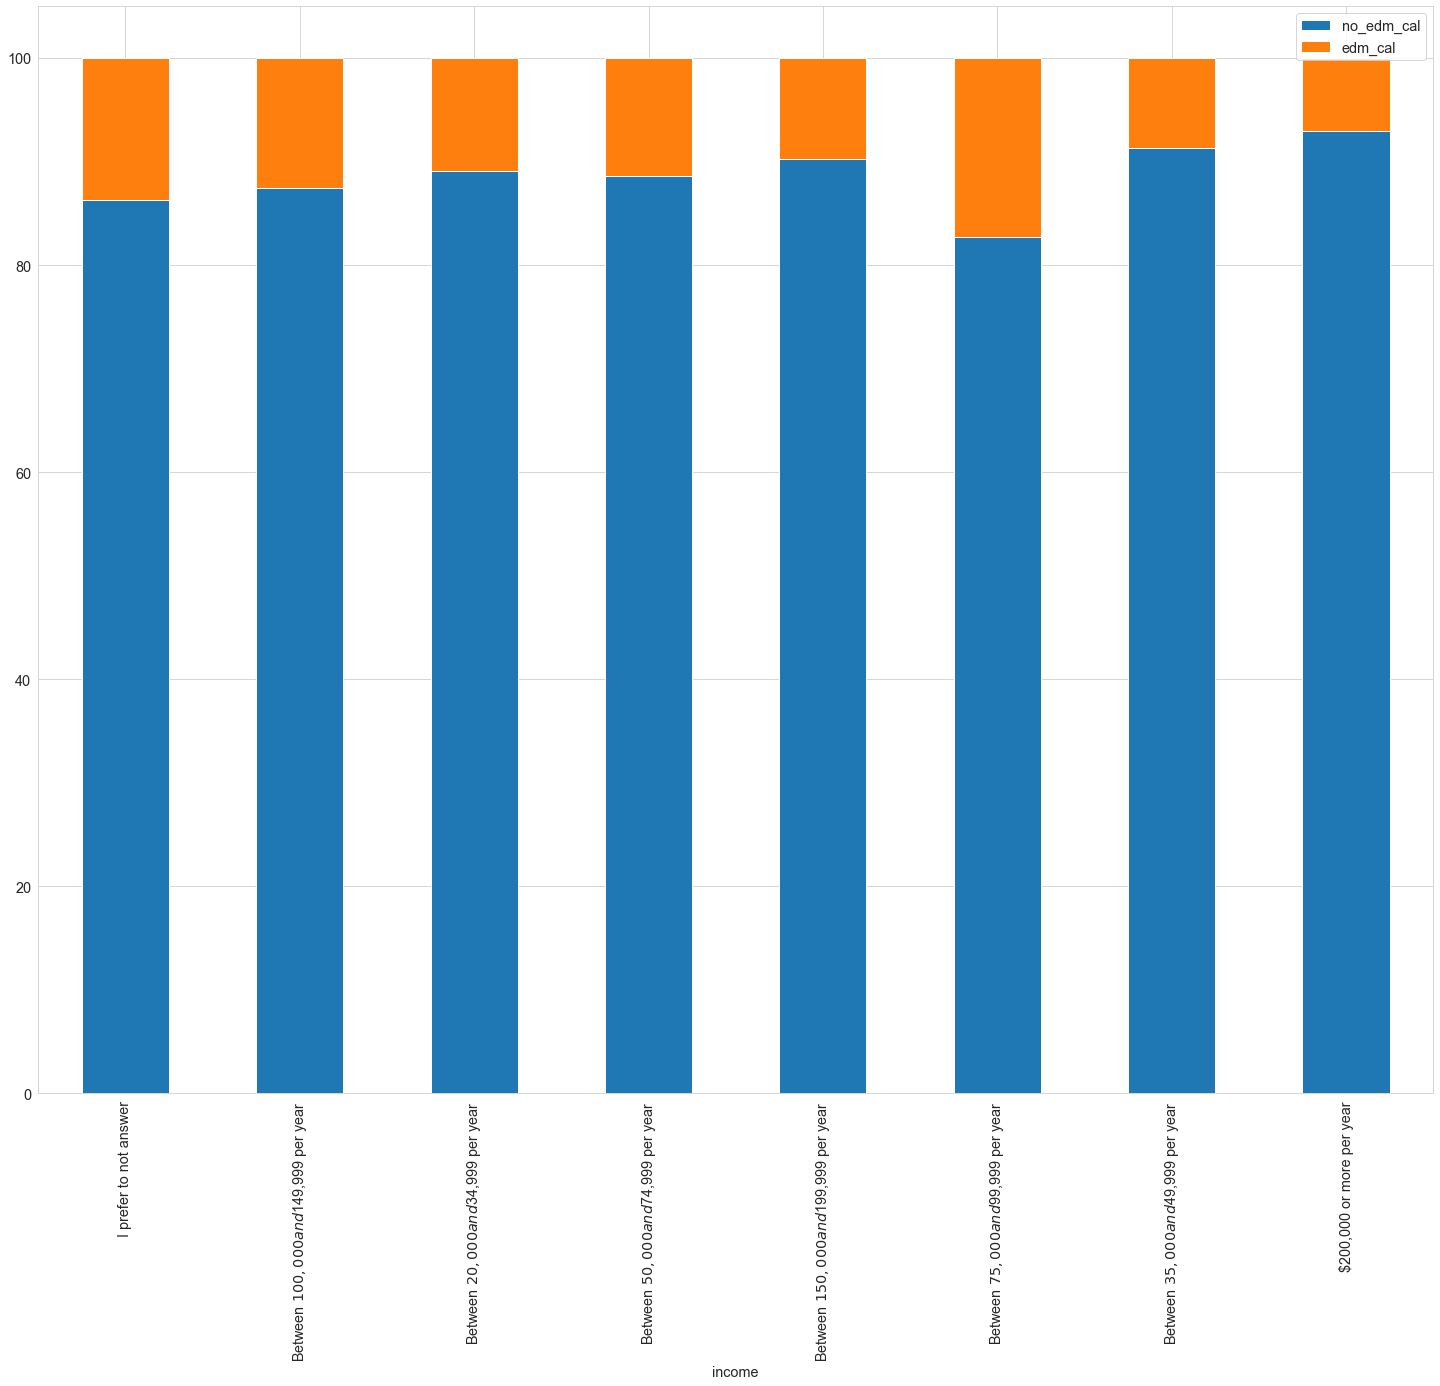

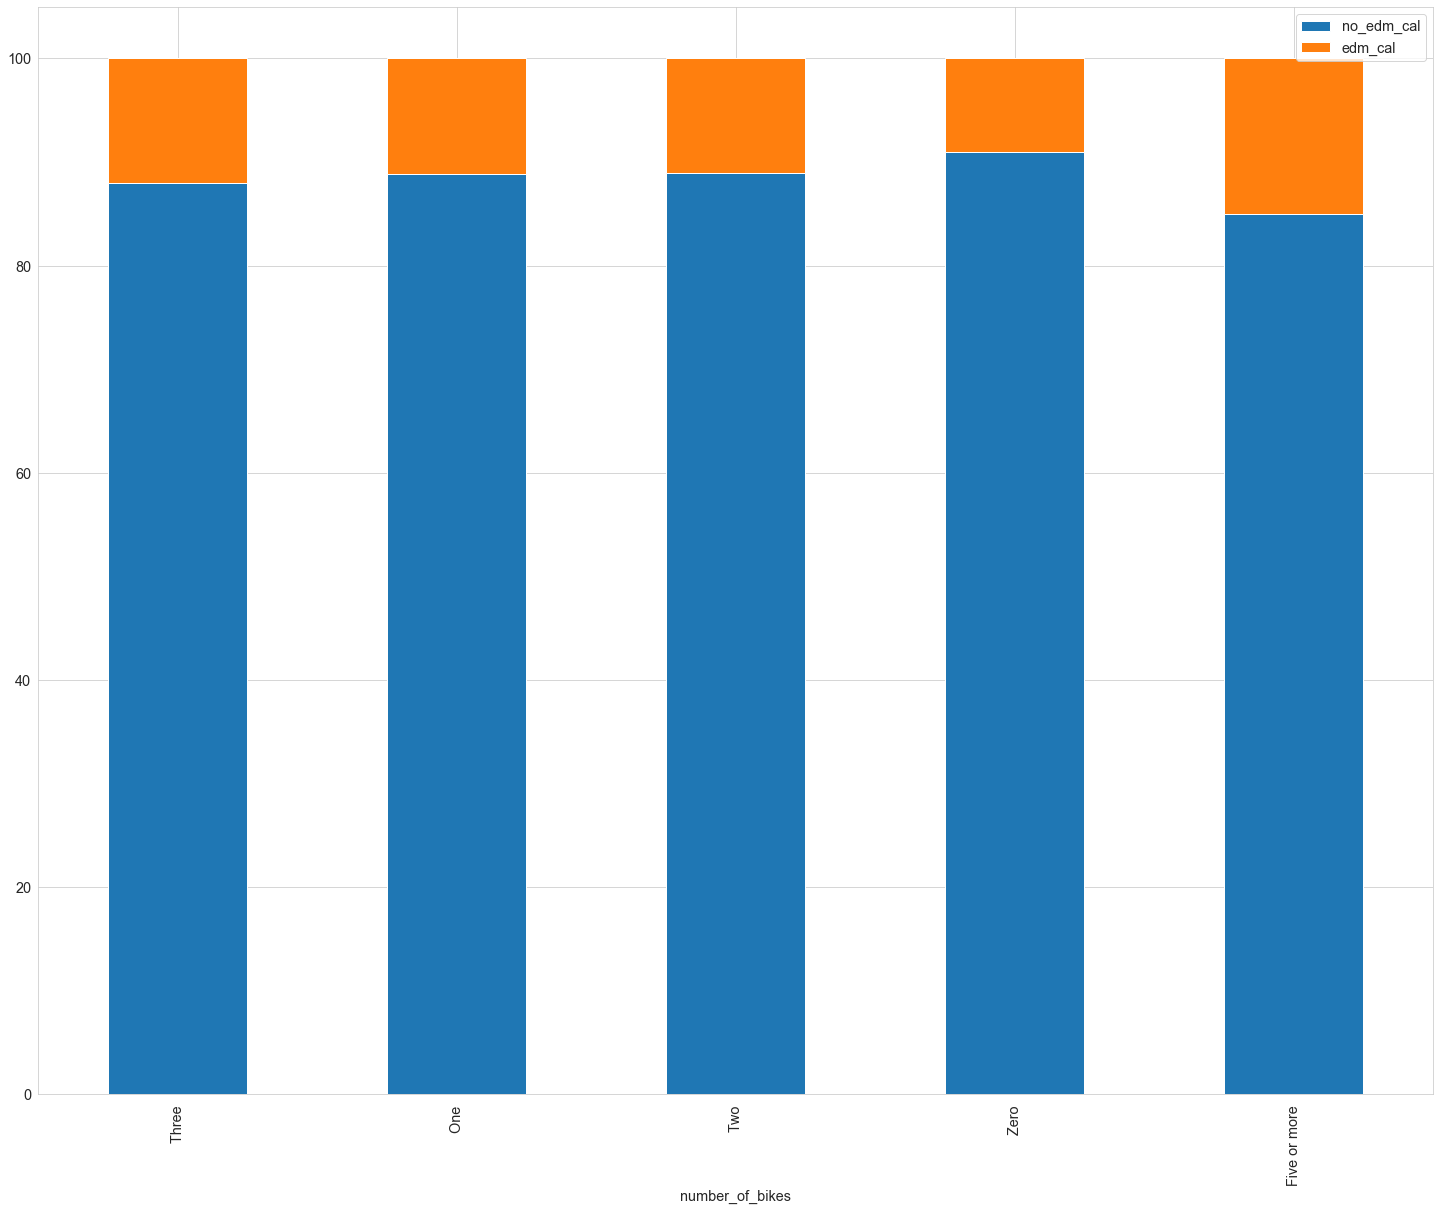

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


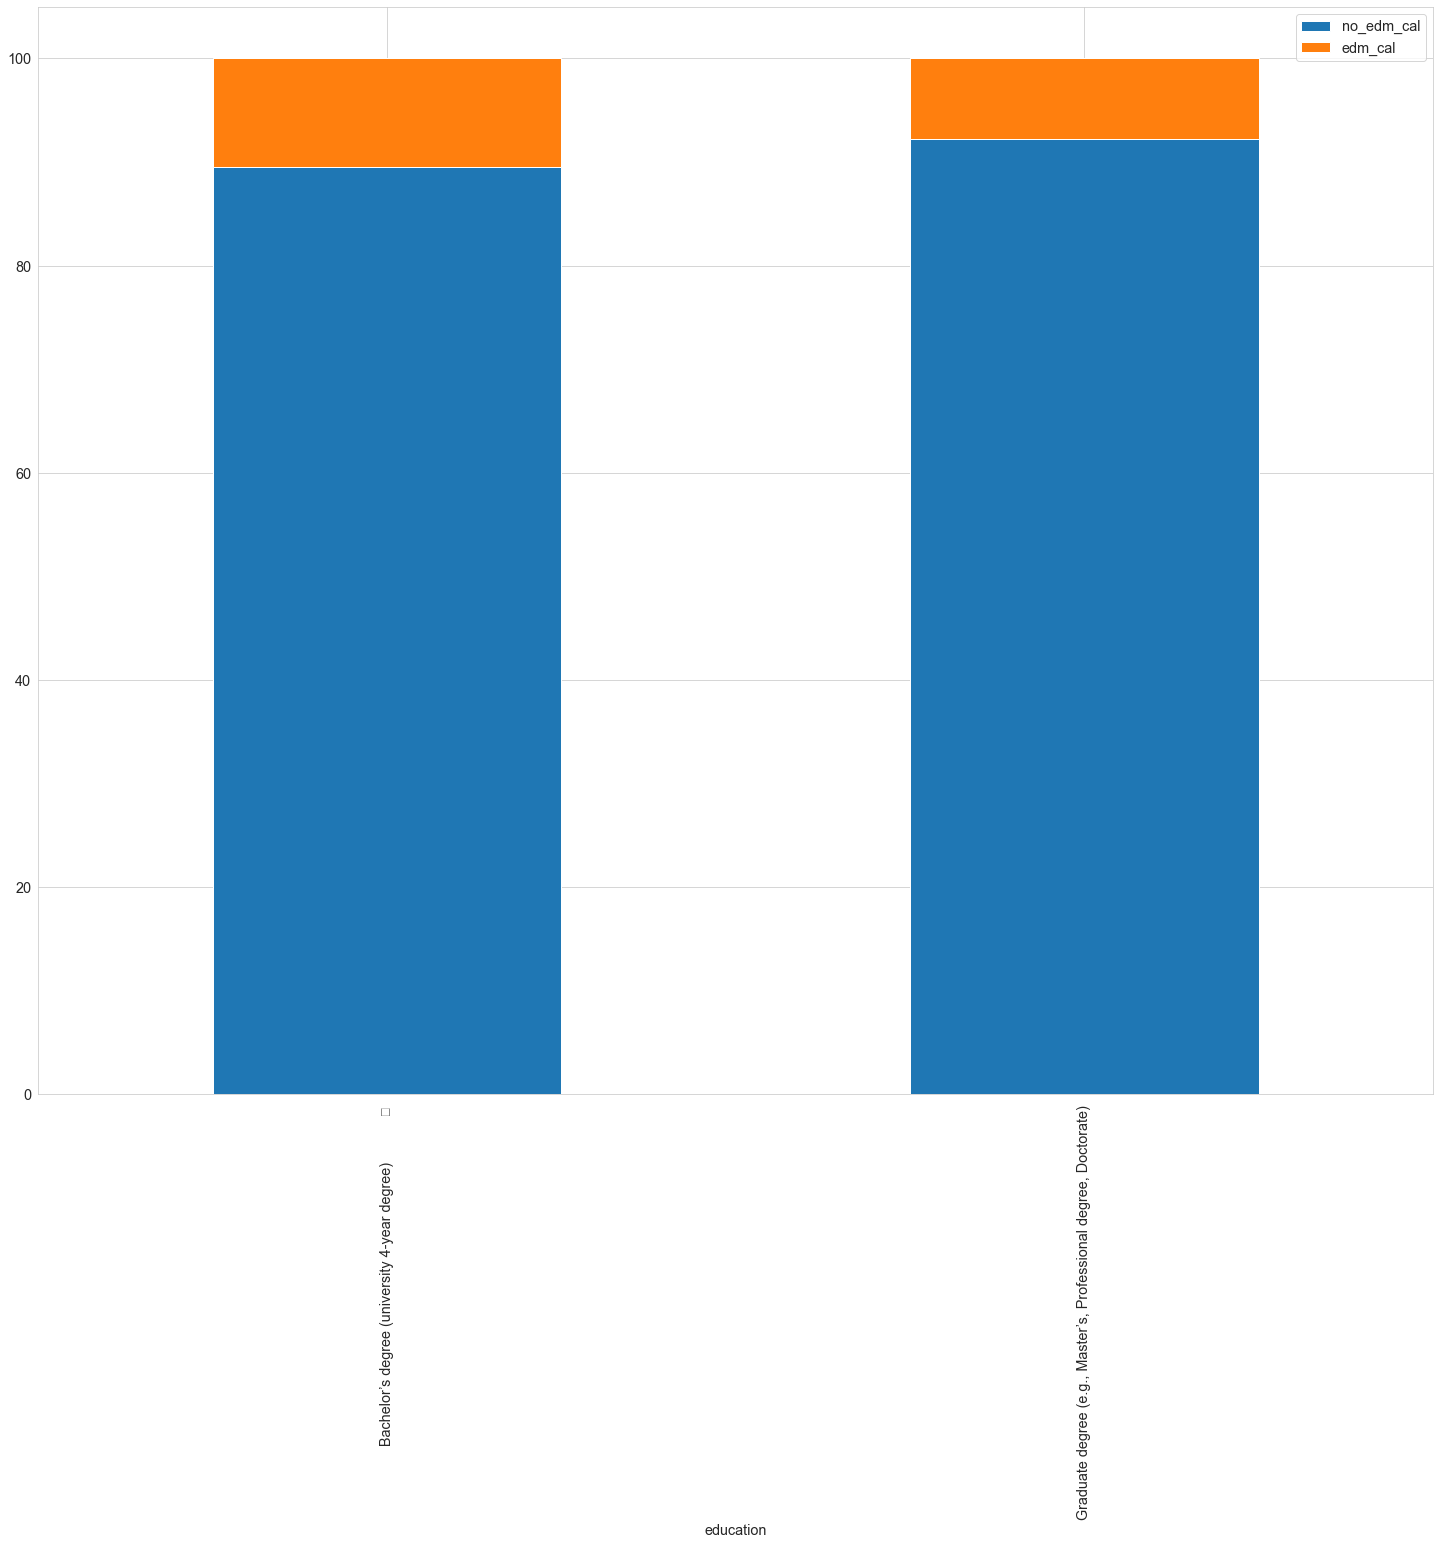

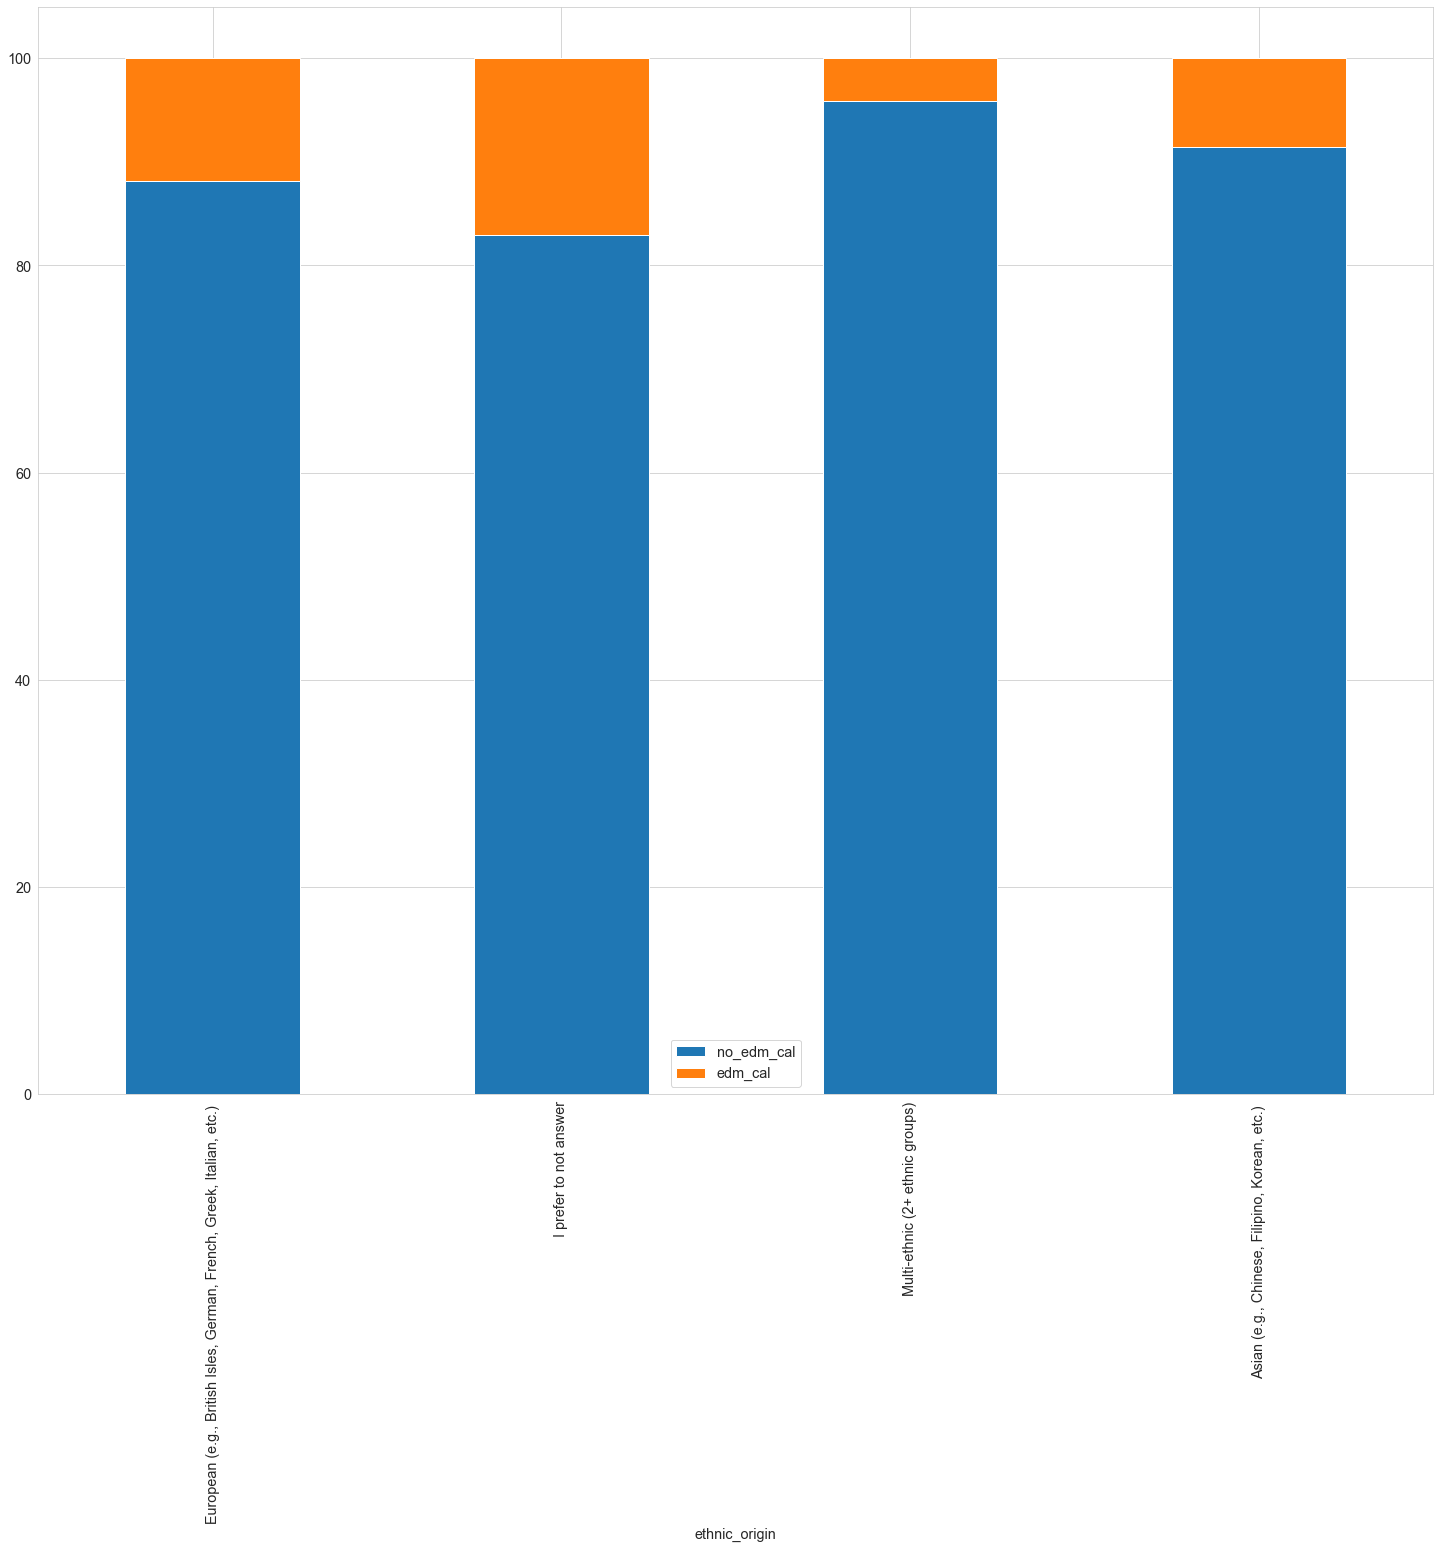

In [30]:
for dft in data_store:
    df= dft.copy()
    q_name = df.index.name
    print(q_name)
    # Calculate recovery-based distributions for the possible answers to a given question

    sum_per_answer = df.sum(axis=1)
    df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100

    # Less popular answers  should be removed, which is relative to the number of possible answers
    temp_sum = df[cols].sum().sum()
    tolerance = temp_sum/(len(df)*2)
    rem_df = df[sum_per_answer<tolerance]
    print('those are not include in the results presentation since less than {} tolerance  {}'.format(tolerance,rem_df))
    new_df = df[sum_per_answer>tolerance]
    # Make a table to export with the real and relative (%) values on the same column
    df_table= DataFrame(columns=cols)
    df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
    df_table.to_csv('python/notebooks/output/{}/csv/'.format(q_research)+ q_name +'.csv')
    df_table

    # Plot the results and save them on the disk
    df_show= DataFrame(columns=cols)
    df_show[cols] = new_df[per_cols_by_ans]
    df_show.plot.bar(stacked=True)
    plt.savefig('python/notebooks/output/{}/figs/'.format(q_research)+q_name+'.png')

    # Indicate when there is interesting results
    find_max= df_show.copy()
    # res save the index of the one with max absolute distance from the average
    res= (abs(find_max.mean() - find_max).idxmax())
    def is_intersting_def(temp_col):
        df_filter = temp_col.reset_index() # Move the question to a column
        outlier_place = df_filter.columns[-1]  # The state to examine
        outlier_att = res[outlier_place] # A possible outlier answer

        # The value for  the possible outlier answer
        is_intersting = df_filter[df_filter[q_name]==outlier_att]
        val_outlier = is_intersting[outlier_place]
        val_outlier
        # Determine the mean and standard deviation without taking into account suspicious outlier
        not_outlier = df_filter[df_filter[q_name]!=outlier_att][outlier_place]
        new_mean = not_outlier.mean()
        new_std = not_outlier.std()
        # Test to determine if it is an outlier and to find out if the results are interesting
        if (abs(val_outlier - new_mean) - new_std> 0).any():
            print ('for {} ({}) : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,round(val_outlier.values[0],2),outlier_att,round(new_mean,2),round(new_std,2)))
    res =find_max.apply(is_intersting_def)